# Imports and Dataset

In [ ]:
pip install numpy==1.26.4

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(np.__version__)

1.26.4


In [104]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

# Preprocessing

## Examining the Dataset

In [288]:
# Add this cell to your jupyter notebook
# Data Visualization and Analysis for Burnout Prediction

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

def comprehensive_data_analysis(df):
    """Comprehensive data visualization and analysis"""
    
    print("🔍 COMPREHENSIVE DATA ANALYSIS")
    print("=" * 60)
    
    # Basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # 1. DATA OVERVIEW
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('📊 Data Overview', fontsize=16, fontweight='bold')
    
    # Missing values heatmap
    sns.heatmap(df.isnull(), cbar=True, ax=axes[0,0], cmap='viridis')
    axes[0,0].set_title('Missing Values Pattern')
    axes[0,0].set_xlabel('Features')
    
    # Data types
    dtype_counts = df.dtypes.value_counts()
    axes[0,1].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
    axes[0,1].set_title('Data Types Distribution')
    
    # Dataset size info
    axes[1,0].bar(['Rows', 'Columns', 'Missing Values', 'Duplicates'], 
                  [df.shape[0], df.shape[1], df.isnull().sum().sum(), df.duplicated().sum()])
    axes[1,0].set_title('Dataset Statistics')
    axes[1,0].set_ylabel('Count')
    
    # Memory usage by column
    memory_usage = df.memory_usage(deep=True)
    memory_usage.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Memory Usage by Column')
    axes[1,1].set_ylabel('Bytes')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def target_variable_analysis(df):
    """Analyze the target variable (Burn Rate)"""
    
    print("\n🎯 TARGET VARIABLE ANALYSIS")
    print("=" * 40)
    
    if 'Burn Rate' not in df.columns:
        print("❌ Burn Rate column not found!")
        return
    
    burn_rate = df['Burn Rate'].dropna()
    
    # Statistics
    print(f"Count: {len(burn_rate)}")
    print(f"Mean: {burn_rate.mean():.4f}")
    print(f"Median: {burn_rate.median():.4f}")
    print(f"Std: {burn_rate.std():.4f}")
    print(f"Min: {burn_rate.min():.4f}")
    print(f"Max: {burn_rate.max():.4f}")
    print(f"Skewness: {burn_rate.skew():.4f}")
    print(f"Kurtosis: {burn_rate.kurtosis():.4f}")
    
    # Check normality
    shapiro_stat, shapiro_p = stats.shapiro(burn_rate.sample(min(5000, len(burn_rate))))
    print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
    if shapiro_p < 0.05:
        print("⚠️ Target is NOT normally distributed")
    else:
        print("✅ Target appears normally distributed")
    
    # Visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🎯 Burn Rate Analysis', fontsize=16, fontweight='bold')
    
    # Distribution
    axes[0,0].hist(burn_rate, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(burn_rate.mean(), color='red', linestyle='--', label=f'Mean: {burn_rate.mean():.3f}')
    axes[0,0].axvline(burn_rate.median(), color='orange', linestyle='--', label=f'Median: {burn_rate.median():.3f}')
    axes[0,0].set_title('Burn Rate Distribution')
    axes[0,0].set_xlabel('Burn Rate')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    
    # Box plot
    axes[0,1].boxplot(burn_rate)
    axes[0,1].set_title('Burn Rate Box Plot')
    axes[0,1].set_ylabel('Burn Rate')
    
    # Q-Q plot
    stats.probplot(burn_rate, dist="norm", plot=axes[0,2])
    axes[0,2].set_title('Q-Q Plot (Normal Distribution)')
    
    # KDE plot
    sns.kdeplot(data=burn_rate, ax=axes[1,0], fill=True)
    axes[1,0].set_title('Burn Rate Density')
    
    # Cumulative distribution
    axes[1,1].hist(burn_rate, bins=50, cumulative=True, alpha=0.7, color='lightgreen')
    axes[1,1].set_title('Cumulative Distribution')
    axes[1,1].set_xlabel('Burn Rate')
    axes[1,1].set_ylabel('Cumulative Frequency')
    
    # Risk categories
    risk_categories = df['Burn Rate'].apply(categorize_burnout_risk).value_counts()
    axes[1,2].pie(risk_categories.values, labels=risk_categories.index, autopct='%1.1f%%')
    axes[1,2].set_title('Risk Categories Distribution')
    
    plt.tight_layout()
    plt.show()

def feature_distribution_analysis(df):
    """Analyze distribution of all features"""
    
    print("\n📈 FEATURE DISTRIBUTION ANALYSIS")
    print("=" * 40)
    
    # Numerical features
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate optimal subplot layout
    n_features = len(numerical_cols)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    fig.suptitle('📊 Feature Distributions', fontsize=16, fontweight='bold')
    
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Histogram with KDE
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, density=True, color='lightblue')
            
            # Add KDE curve
            if len(df[col].dropna()) > 1:
                sns.kdeplot(data=df[col].dropna(), ax=axes[i], color='red', linewidth=2)
            
            axes[i].set_title(f'{col}\nMean: {df[col].mean():.3f}, Std: {df[col].std():.3f}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def correlation_analysis(df):
    """Comprehensive correlation analysis"""
    
    print("\n🔗 CORRELATION ANALYSIS")
    print("=" * 30)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) < 2:
        print("❌ Need at least 2 numerical columns for correlation analysis")
        return
    
    # Correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Correlation with target
    if 'Burn Rate' in corr_matrix.columns:
        target_corr = corr_matrix['Burn Rate'].drop('Burn Rate').sort_values(key=abs, ascending=False)
        
        print("🎯 Correlation with Burn Rate:")
        print("-" * 30)
        for feature, corr in target_corr.items():
            strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
            print(f"{feature:<25}: {corr:>7.4f} ({strength})")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🔗 Correlation Analysis', fontsize=16, fontweight='bold')
    
    # Correlation heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', ax=axes[0,0])
    axes[0,0].set_title('Correlation Matrix')
    
    # Target correlation bar plot
    if 'Burn Rate' in corr_matrix.columns:
        target_corr.plot(kind='barh', ax=axes[0,1], color=['red' if x < 0 else 'blue' for x in target_corr])
        axes[0,1].set_title('Correlation with Burn Rate')
        axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # High correlation pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:  # Threshold for high correlation
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    
    if high_corr_pairs:
        pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
        pairs_df['Abs_Correlation'] = abs(pairs_df['Correlation'])
        pairs_df = pairs_df.sort_values('Abs_Correlation', ascending=True)
        
        axes[1,0].barh(range(len(pairs_df)), pairs_df['Correlation'])
        axes[1,0].set_yticks(range(len(pairs_df)))
        axes[1,0].set_yticklabels([f"{row['Feature1']} - {row['Feature2']}" for _, row in pairs_df.iterrows()])
        axes[1,0].set_title('High Correlation Pairs (|r| > 0.5)')
        axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Eigenvalues (multicollinearity check)
    eigenvals = np.linalg.eigvals(corr_matrix)
    axes[1,1].bar(range(len(eigenvals)), sorted(eigenvals, reverse=True))
    axes[1,1].set_title('Correlation Matrix Eigenvalues')
    axes[1,1].set_xlabel('Component')
    axes[1,1].set_ylabel('Eigenvalue')
    axes[1,1].axhline(y=0.1, color='red', linestyle='--', label='Multicollinearity threshold')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print multicollinearity warning
    min_eigenval = min(eigenvals)
    condition_number = max(eigenvals) / min_eigenval
    print(f"\nMulticollinearity Analysis:")
    print(f"Condition Number: {condition_number:.2f}")
    if condition_number > 30:
        print("⚠️ High multicollinearity detected! Consider feature selection.")
    elif condition_number > 15:
        print("⚠️ Moderate multicollinearity present.")
    else:
        print("✅ Low multicollinearity - good feature independence.")

def categorical_analysis(df):
    """Analyze categorical features"""
    
    print("\n📊 CATEGORICAL FEATURES ANALYSIS")
    print("=" * 40)
    
    # Identify categorical columns (including binary)
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() <= 10:
            categorical_cols.append(col)
    
    if not categorical_cols:
        print("No categorical features found.")
        return
    
    print(f"Found {len(categorical_cols)} categorical features: {categorical_cols}")
    
    # Create visualizations
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    fig.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold')
    
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        if i < len(axes):
            value_counts = df[col].value_counts()
            
            # Create bar plot
            axes[i].bar(range(len(value_counts)), value_counts.values, color='lightblue')
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45)
            axes[i].set_title(f'{col}\n(Unique values: {df[col].nunique()})')
            axes[i].set_ylabel('Count')
            
            # Add percentage labels
            total = len(df[col].dropna())
            for j, v in enumerate(value_counts.values):
                axes[i].text(j, v + max(value_counts) * 0.01, f'{v/total*100:.1f}%', 
                           ha='center', va='bottom')
    
    # Hide empty subplots
    for j in range(len(categorical_cols), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def outlier_analysis(df):
    """Comprehensive outlier analysis"""
    
    print("\n🚨 OUTLIER ANALYSIS")
    print("=" * 25)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outlier_summary = []
    
    fig, axes = plt.subplots(2, len(numerical_cols), figsize=(4*len(numerical_cols), 8))
    fig.suptitle('🚨 Outlier Detection', fontsize=16, fontweight='bold')
    
    if len(numerical_cols) == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numerical_cols):
        data = df[col].dropna()
        
        # IQR method
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
        
        # Z-score method
        z_scores = np.abs(stats.zscore(data))
        outliers_zscore = data[z_scores > 3]
        
        outlier_summary.append({
            'Feature': col,
            'IQR_Outliers': len(outliers_iqr),
            'IQR_Percentage': len(outliers_iqr) / len(data) * 100,
            'ZScore_Outliers': len(outliers_zscore),
            'ZScore_Percentage': len(outliers_zscore) / len(data) * 100
        })
        
        # Box plot
        axes[0, i].boxplot(data)
        axes[0, i].set_title(f'{col}\nIQR: {len(outliers_iqr)} outliers')
        axes[0, i].set_ylabel('Value')
        
        # Histogram with outlier boundaries
        axes[1, i].hist(data, bins=30, alpha=0.7, color='lightblue')
        axes[1, i].axvline(lower_bound, color='red', linestyle='--', label='Lower bound')
        axes[1, i].axvline(upper_bound, color='red', linestyle='--', label='Upper bound')
        axes[1, i].set_title(f'{col}\nZ-score: {len(outliers_zscore)} outliers')
        axes[1, i].set_xlabel('Value')
        axes[1, i].set_ylabel('Frequency')
        axes[1, i].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    outlier_df = pd.DataFrame(outlier_summary)
    print("\nOutlier Summary:")
    print(outlier_df.to_string(index=False))
    
    total_iqr_outliers = outlier_df['IQR_Outliers'].sum()
    total_zscore_outliers = outlier_df['ZScore_Outliers'].sum()
    
    print(f"\nTotal IQR outliers: {total_iqr_outliers}")
    print(f"Total Z-score outliers: {total_zscore_outliers}")
    
    if total_iqr_outliers > len(df) * 0.05:  # More than 5%
        print("⚠️ High number of outliers detected! Consider outlier treatment.")
    else:
        print("✅ Reasonable number of outliers.")

def feature_relationships(df):
    """Analyze relationships between features and target"""
    
    print("\n🔄 FEATURE RELATIONSHIPS WITH TARGET")
    print("=" * 45)
    
    if 'Burn Rate' not in df.columns:
        print("❌ Target variable 'Burn Rate' not found!")
        return
    
    numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Burn Rate']
    
    if len(numerical_cols) == 0:
        print("No numerical features found for relationship analysis.")
        return
    
    # Calculate optimal layout
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    fig.suptitle('🔄 Feature vs Target Relationships', fontsize=16, fontweight='bold')
    
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Scatter plot with regression line
            x = df[col].dropna()
            y = df.loc[x.index, 'Burn Rate']
            
            axes[i].scatter(x, y, alpha=0.6, color='blue', s=10)
            
            # Add regression line
            if len(x) > 1:
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                axes[i].plot(x, p(x), "r--", alpha=0.8)
                
                # Calculate R²
                correlation = np.corrcoef(x, y)[0, 1]
                axes[i].set_title(f'{col} vs Burn Rate\nCorrelation: {correlation:.3f}')
            else:
                axes[i].set_title(f'{col} vs Burn Rate')
            
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Burn Rate')
    
    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def normalization_analysis(df):
    """Analyze if normalization is needed"""
    
    print("\n⚖️ NORMALIZATION ANALYSIS")
    print("=" * 30)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate statistics
    stats_summary = []
    for col in numerical_cols:
        data = df[col].dropna()
        stats_summary.append({
            'Feature': col,
            'Min': data.min(),
            'Max': data.max(),
            'Range': data.max() - data.min(),
            'Mean': data.mean(),
            'Std': data.std(),
            'CV': data.std() / data.mean() if data.mean() != 0 else np.inf,  # Coefficient of variation
            'Scale_Factor': data.max() / data.min() if data.min() != 0 else np.inf
        })
    
    stats_df = pd.DataFrame(stats_summary)
    
    print("Feature Scale Analysis:")
    print(stats_df[['Feature', 'Min', 'Max', 'Range', 'Scale_Factor']].to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('⚖️ Normalization Need Analysis', fontsize=16, fontweight='bold')
    
    # Range comparison
    axes[0,0].bar(stats_df['Feature'], stats_df['Range'])
    axes[0,0].set_title('Feature Ranges')
    axes[0,0].set_ylabel('Range')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Scale factor comparison
    scale_factors = stats_df['Scale_Factor'].replace([np.inf, -np.inf], np.nan).dropna()
    if len(scale_factors) > 0:
        axes[0,1].bar(stats_df.loc[scale_factors.index, 'Feature'], scale_factors)
        axes[0,1].set_title('Scale Factors (Max/Min)')
        axes[0,1].set_ylabel('Scale Factor')
        axes[0,1].tick_params(axis='x', rotation=45)
        axes[0,1].axhline(y=10, color='red', linestyle='--', label='High variance threshold')
        axes[0,1].legend()
    
    # Coefficient of variation
    cv_values = stats_df['CV'].replace([np.inf, -np.inf], np.nan).dropna()
    if len(cv_values) > 0:
        axes[1,0].bar(stats_df.loc[cv_values.index, 'Feature'], cv_values)
        axes[1,0].set_title('Coefficient of Variation')
        axes[1,0].set_ylabel('CV (Std/Mean)')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # Standard deviations
    axes[1,1].bar(stats_df['Feature'], stats_df['Std'])
    axes[1,1].set_title('Standard Deviations')
    axes[1,1].set_ylabel('Standard Deviation')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Recommendations
    print("\n📋 NORMALIZATION RECOMMENDATIONS:")
    print("-" * 35)
    
    max_range = stats_df['Range'].max()
    min_range = stats_df['Range'].min()
    max_scale_factor = stats_df['Scale_Factor'].replace([np.inf, -np.inf], 0).max()
    
    if max_range / min_range > 100:
        print("⚠️ STRONG RECOMMENDATION: Normalize features")
        print(f"   Range ratio: {max_range/min_range:.1f}x difference")
    elif max_range / min_range > 10:
        print("⚠️ MODERATE RECOMMENDATION: Consider normalization")
        print(f"   Range ratio: {max_range/min_range:.1f}x difference")
    else:
        print("✅ OPTIONAL: Features are reasonably scaled")
        print(f"   Range ratio: {max_range/min_range:.1f}x difference")
    
    if max_scale_factor > 1000:
        print("⚠️ Very high scale differences detected!")
    
    print(f"\nFor XGBoost: Normalization is optional but may help with:")
    print("- Faster convergence")
    print("- Better feature importance interpretation")
    print("- Consistency with other algorithms")

# Main analysis function
def run_complete_analysis(df):
    """Run all analysis functions"""
    comprehensive_data_analysis(df)
    target_variable_analysis(df)
    feature_distribution_analysis(df)
    correlation_analysis(df)
    categorical_analysis(df)
    outlier_analysis(df)
    feature_relationships(df)
    normalization_analysis(df)

# Usage in your notebook:
# Load your data first
# train, test = load_data("input/train.csv", "input/test.csv")
# train_processed = preprocess_data(train, is_train=True)

# Then run the analysis
# run_complete_analysis(train_processed)

In [319]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def justify_collinearity(df, target_col):
    # Prepare data
    X = df.drop(columns=[target_col]).select_dtypes(include=[np.number])
    X = X.fillna(X.mean())
    y = df[target_col].fillna(df[target_col].mean())
    
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Calculate VIF 
    vif_values = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
    
    # Test prediction performance with all features
    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    
    # Test prediction performance removing highest VIF feature
    highest_vif_idx = np.argmax(vif_values)
    highest_vif_feature = X.columns[highest_vif_idx]
    X_reduced = X_scaled.drop(columns=[highest_vif_feature])
    cv_scores_reduced = cross_val_score(model, X_reduced, y, cv=5, scoring='r2')
    
    print("COLLINEARITY CHECK")
    print("=" * 40)
    print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Target: {target_col}")
    print()
    
    print("VIF VALUES")
    for feature, vif in zip(X.columns, vif_values):
        status = "VERY HIGH" if vif >= 10 else "HIGH" if vif >= 5 else "OK"
        print(f"  {feature}: {vif:.1f} {status}")
    
    max_vif = max(vif_values)
    print(f"\nWorst VIF: {max_vif:.1f} ({'SEVERE' if max_vif >= 10 else 'HIGH' if max_vif >= 5 else 'OK'})")
    
    print(f"\nPREDICTION PERFORMANCE:")
    print(f"  All features:     R² = {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"  Remove worst VIF: R² = {cv_scores_reduced.mean():.3f} ± {cv_scores_reduced.std():.3f}")
    
    # The verdict
    performance_change = cv_scores_reduced.mean() - cv_scores.mean()
    
    print(f"Performance change: {performance_change}")
    
    return {
        'max_vif': max_vif,
        'all_features_r2': cv_scores.mean(),
        'reduced_features_r2': cv_scores_reduced.mean(),
        'performance_change': performance_change,
        'verdict': 'collinearity_not_a_problem' if abs(performance_change) < 0.01 else 'investigate_further'
    }

In [320]:
result = justify_collinearity(train, 'Burn Rate')

COLLINEARITY CHECK
Dataset: 21458 samples, 3 features
Target: Burn Rate

VIF VALUES
  Designation: 4.6 OK
  Resource Allocation: 6.5 HIGH
  Mental Fatigue Score: 2.7 OK

Worst VIF: 6.5 (HIGH)

PREDICTION PERFORMANCE:
  All features:     R² = 0.924 ± 0.002
  Remove worst VIF: R² = 0.914 ± 0.002
Performance change: -0.009455941665097778


High VIF values do not affect model performance. In fact, the model performance is actually worse when we remove the highest VIF value feature, Resource Allocation. Hence, it is best to keep all the features in the model to maintain performance.

🔍 COMPREHENSIVE DATA ANALYSIS
Dataset shape: (21458, 7)
Memory usage: 0.72 MB


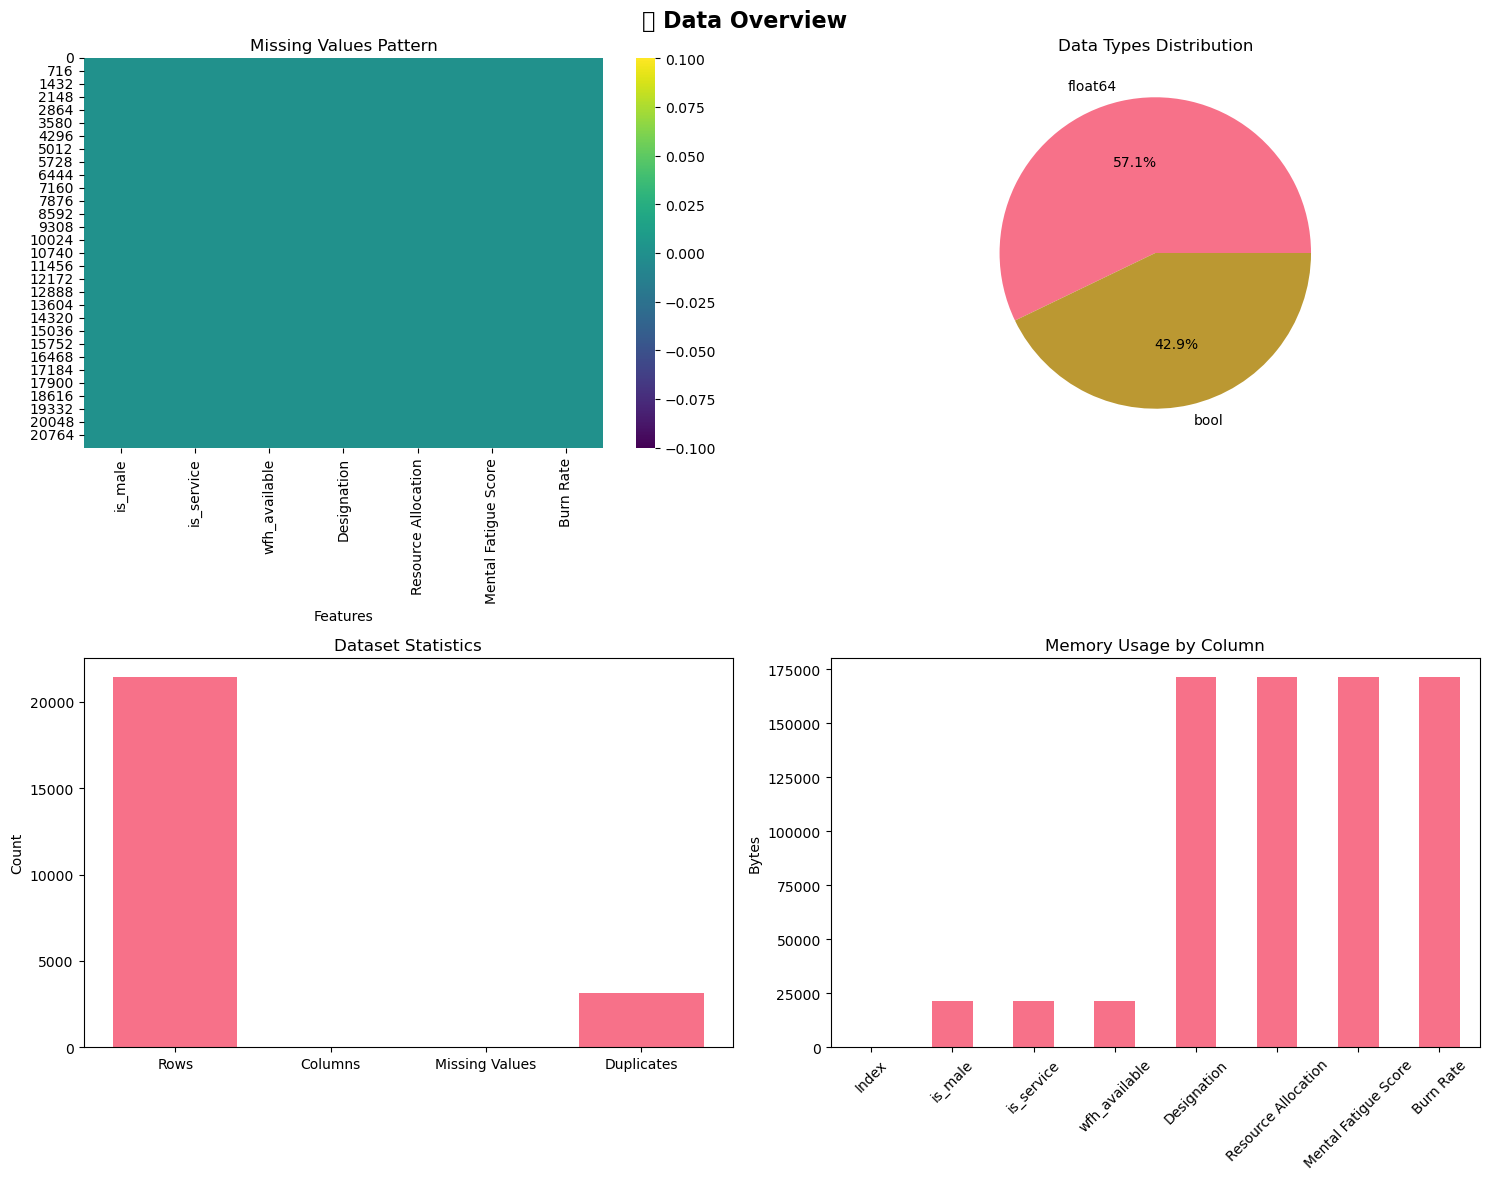


🎯 TARGET VARIABLE ANALYSIS
Count: 21458
Mean: 0.4520
Median: 0.4500
Std: 0.1983
Min: 0.0000
Max: 1.0000
Skewness: 0.0453
Kurtosis: -0.2618
Shapiro-Wilk test p-value: 0.0000
⚠️ Target is NOT normally distributed


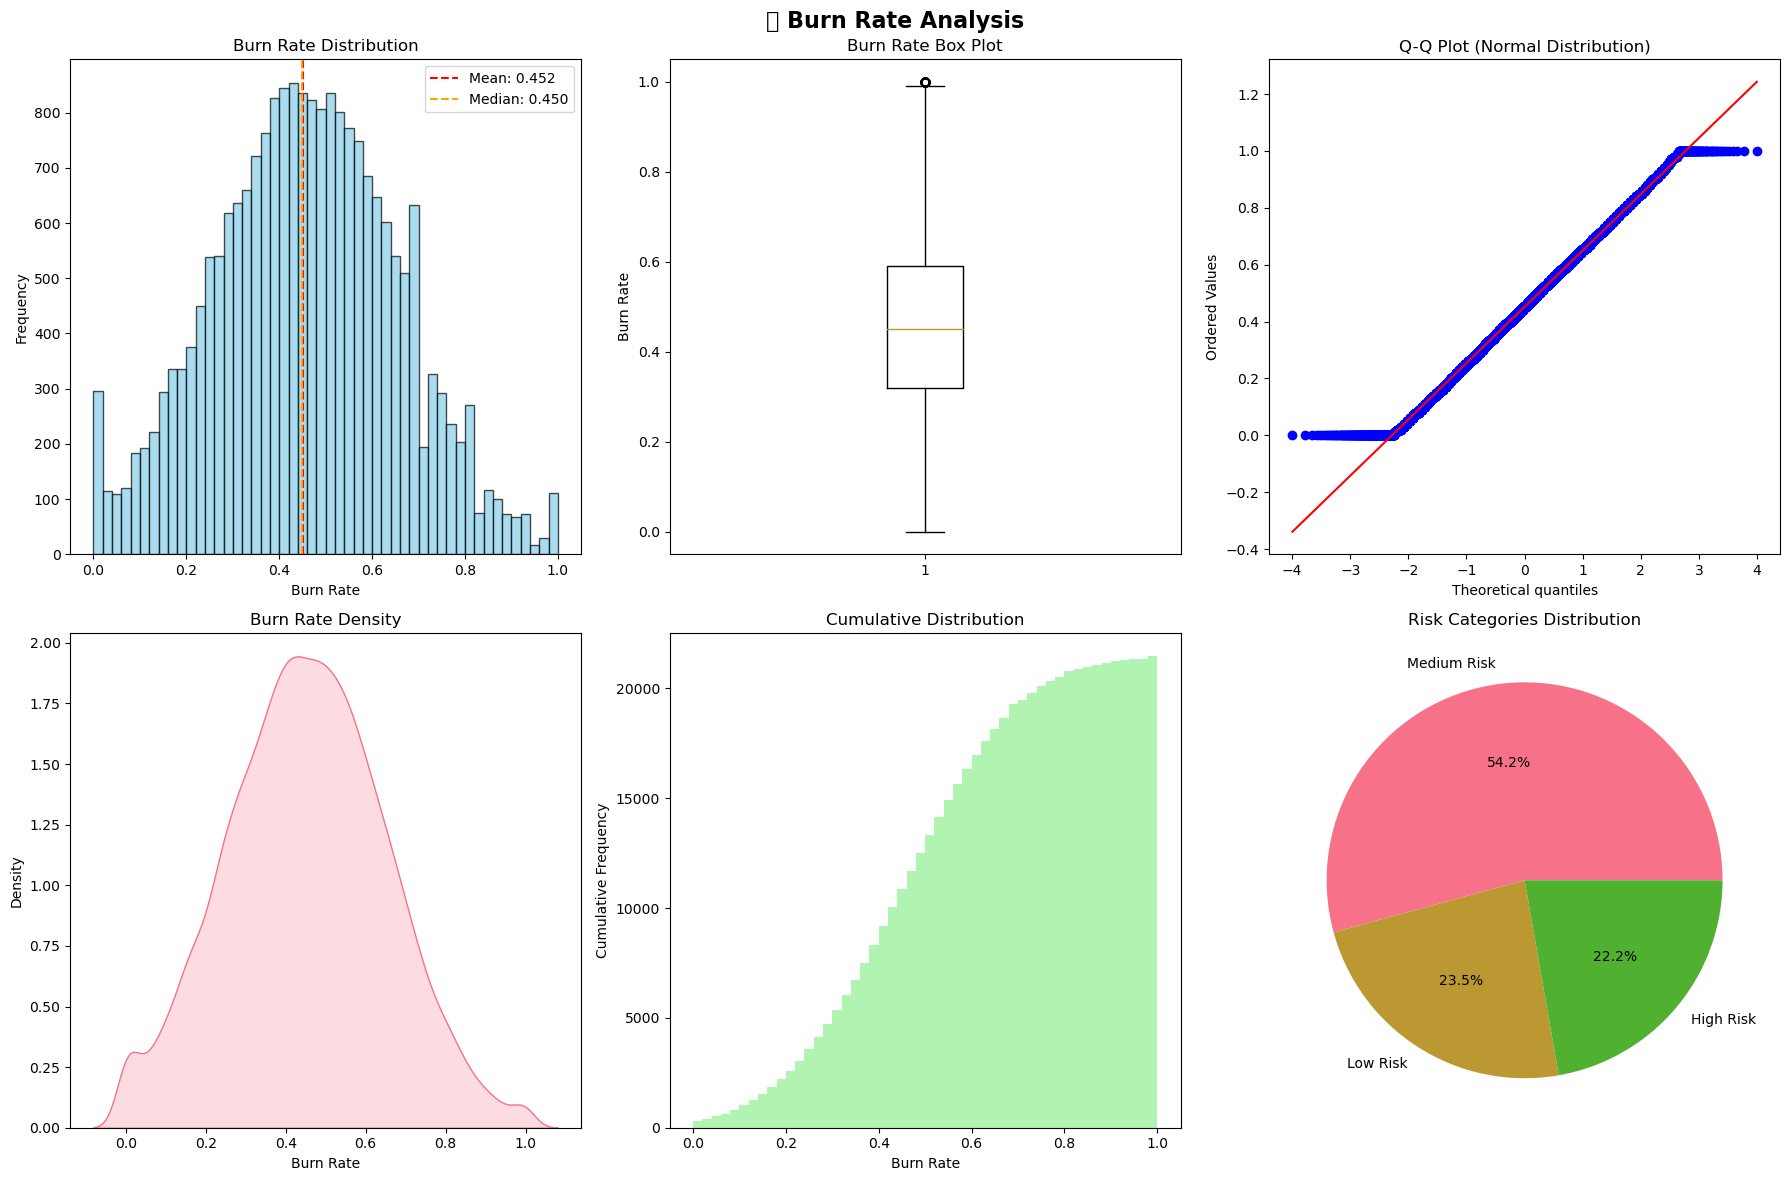


📈 FEATURE DISTRIBUTION ANALYSIS


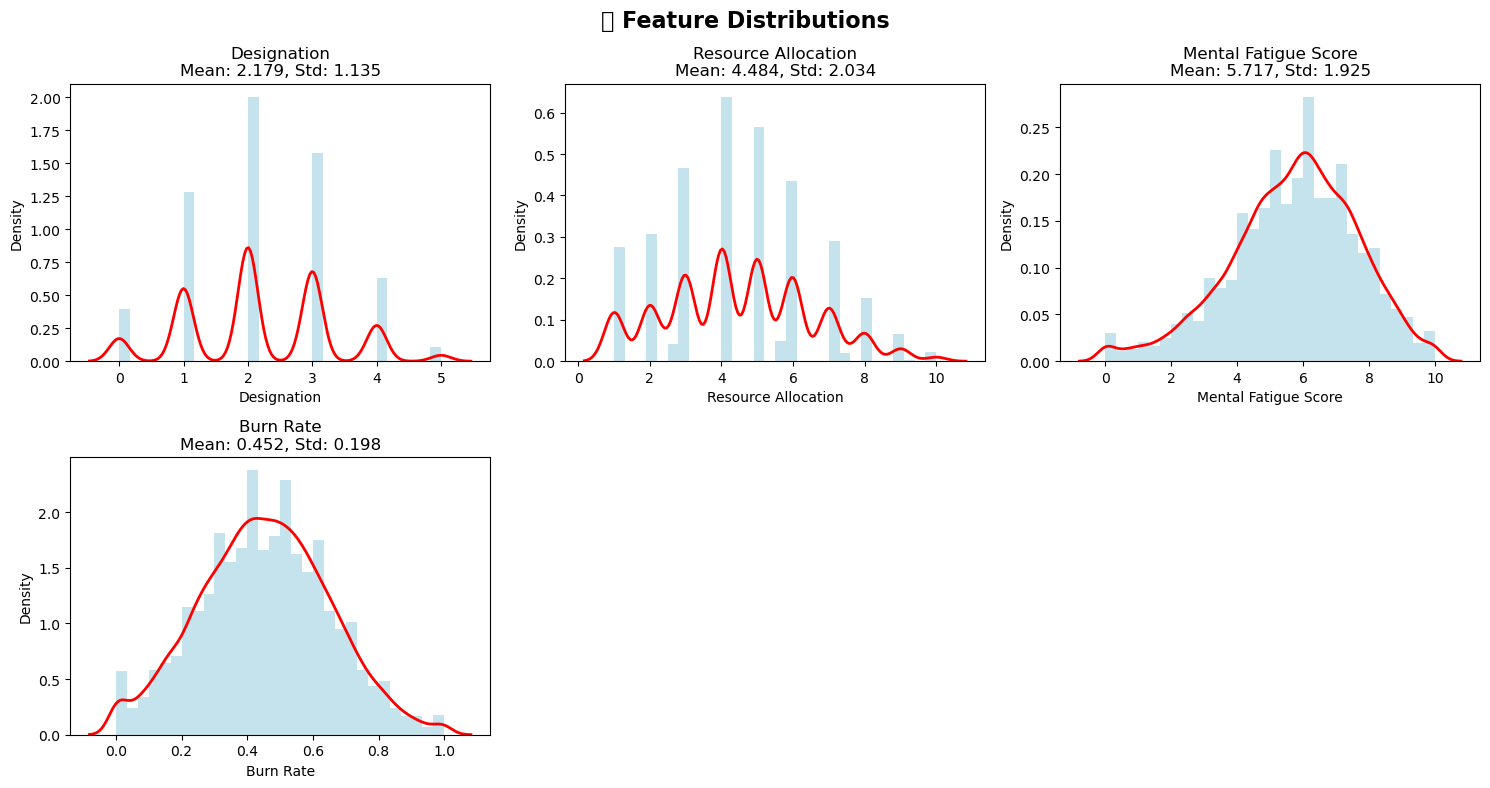


🔗 CORRELATION ANALYSIS
🎯 Correlation with Burn Rate:
------------------------------
Mental Fatigue Score     :  0.9449 (Strong)
Resource Allocation      :  0.8497 (Strong)
Designation              :  0.7378 (Strong)


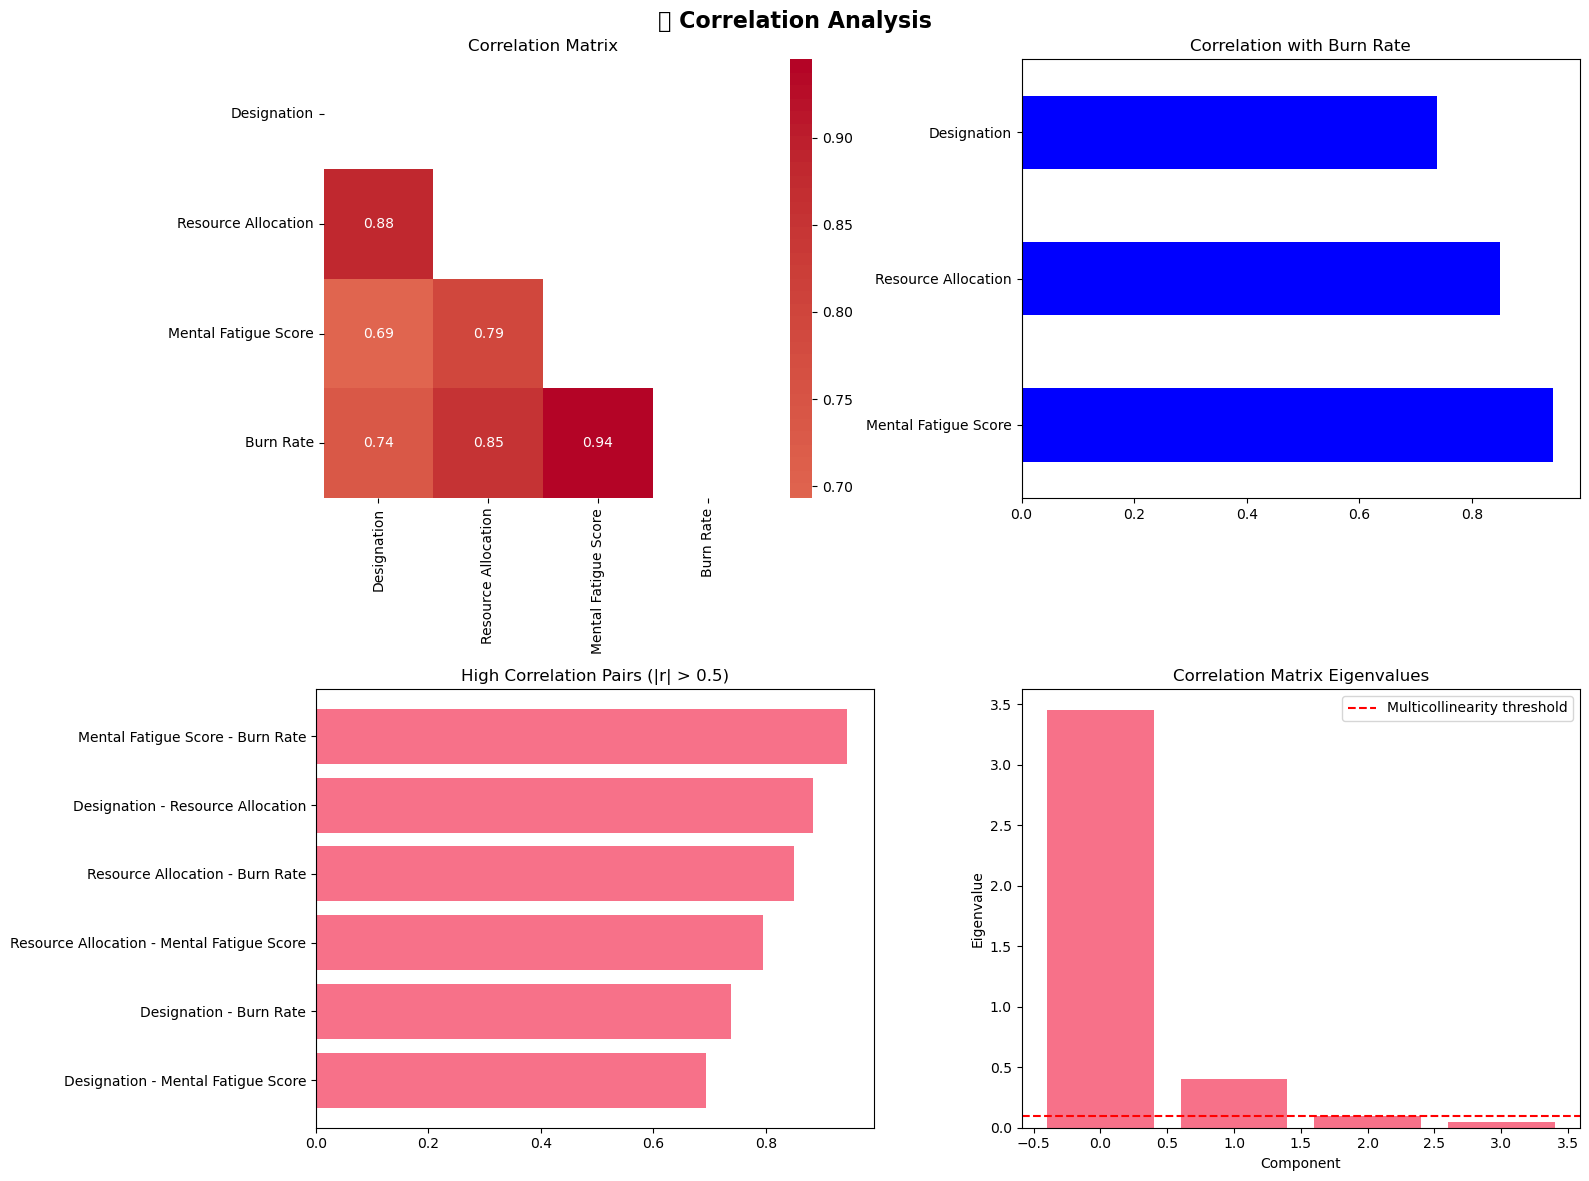


Multicollinearity Analysis:
Condition Number: 72.26
⚠️ High multicollinearity detected! Consider feature selection.

📊 CATEGORICAL FEATURES ANALYSIS
Found 4 categorical features: ['is_male', 'is_service', 'wfh_available', 'Designation']


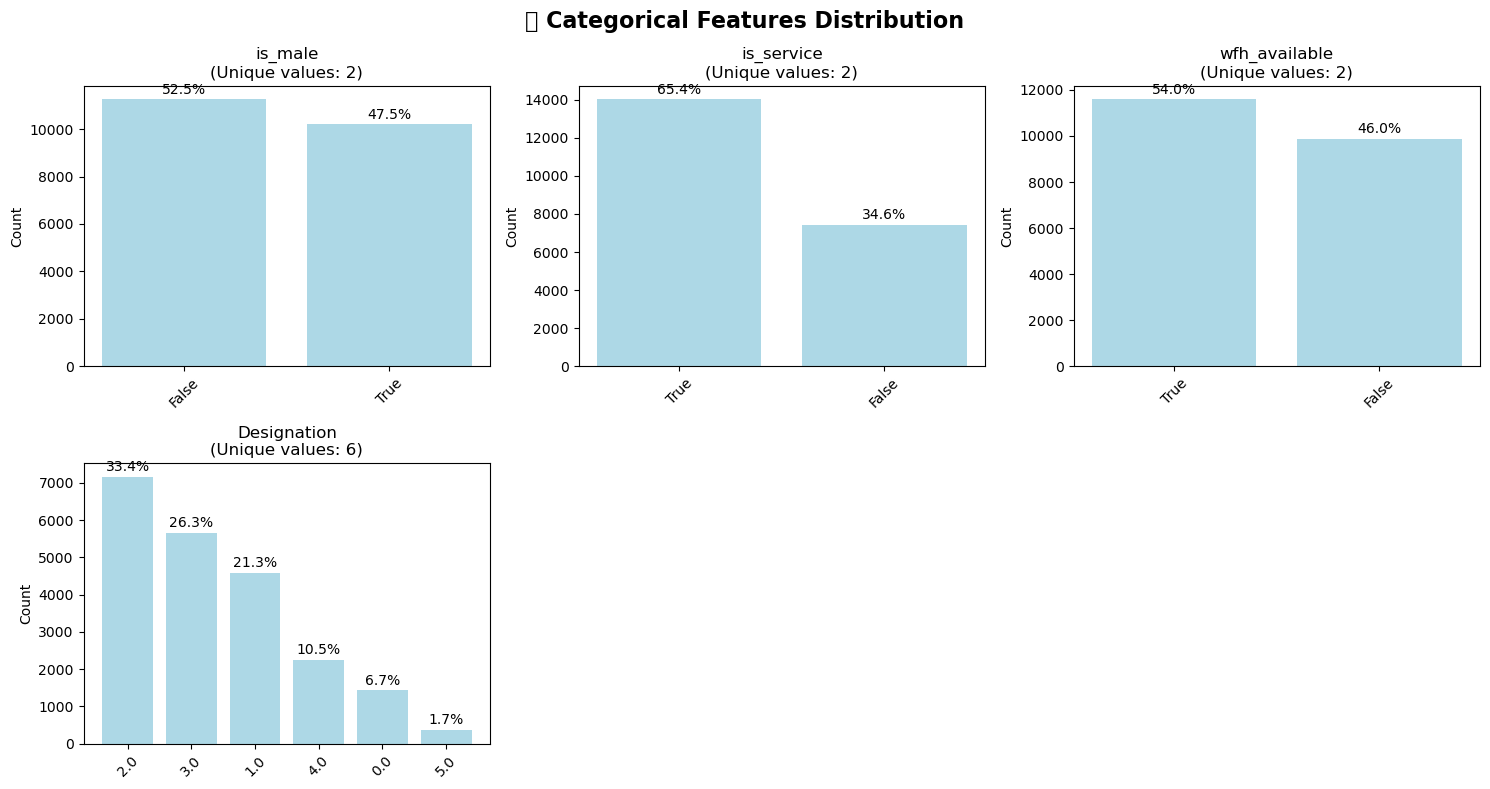


🚨 OUTLIER ANALYSIS


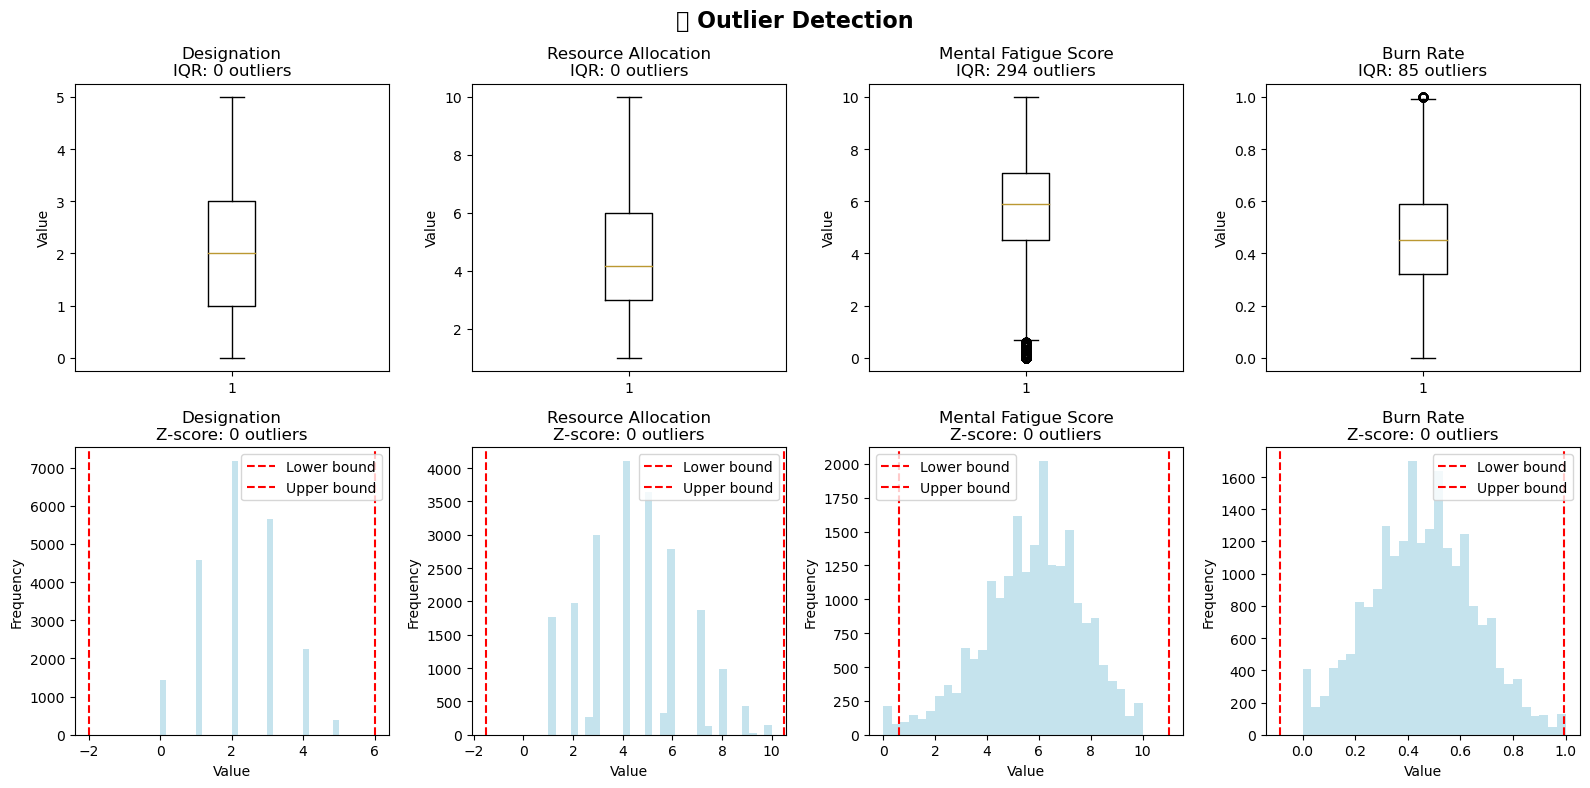


Outlier Summary:
             Feature  IQR_Outliers  IQR_Percentage  ZScore_Outliers  ZScore_Percentage
         Designation             0        0.000000                0                0.0
 Resource Allocation             0        0.000000                0                0.0
Mental Fatigue Score           294        1.370118                0                0.0
           Burn Rate            85        0.396123                0                0.0

Total IQR outliers: 379
Total Z-score outliers: 0
✅ Reasonable number of outliers.

🔄 FEATURE RELATIONSHIPS WITH TARGET


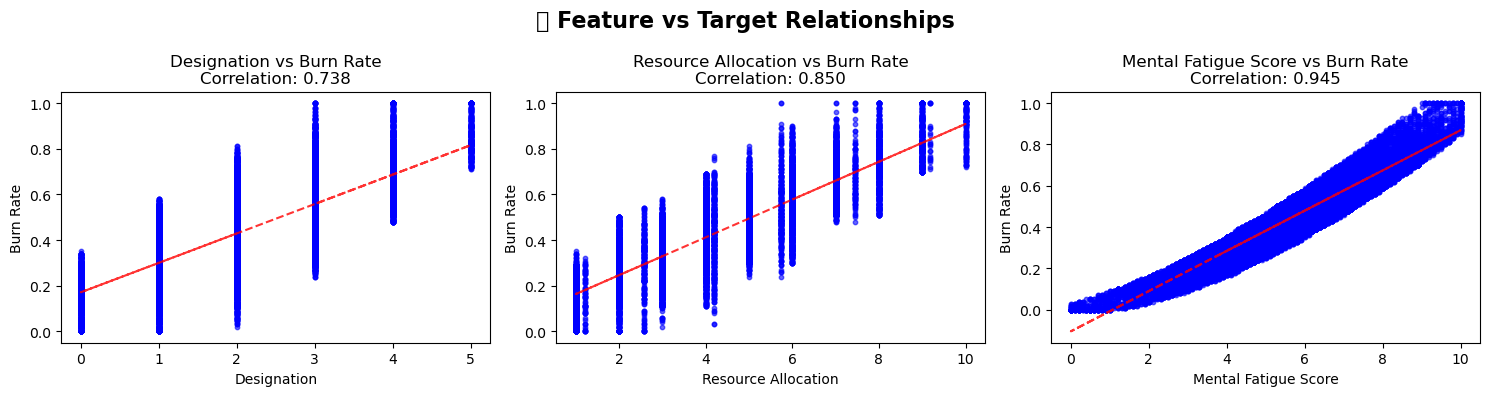


⚖️ NORMALIZATION ANALYSIS
Feature Scale Analysis:
             Feature  Min  Max  Range  Scale_Factor
         Designation  0.0  5.0    5.0           inf
 Resource Allocation  1.0 10.0    9.0          10.0
Mental Fatigue Score  0.0 10.0   10.0           inf
           Burn Rate  0.0  1.0    1.0           inf


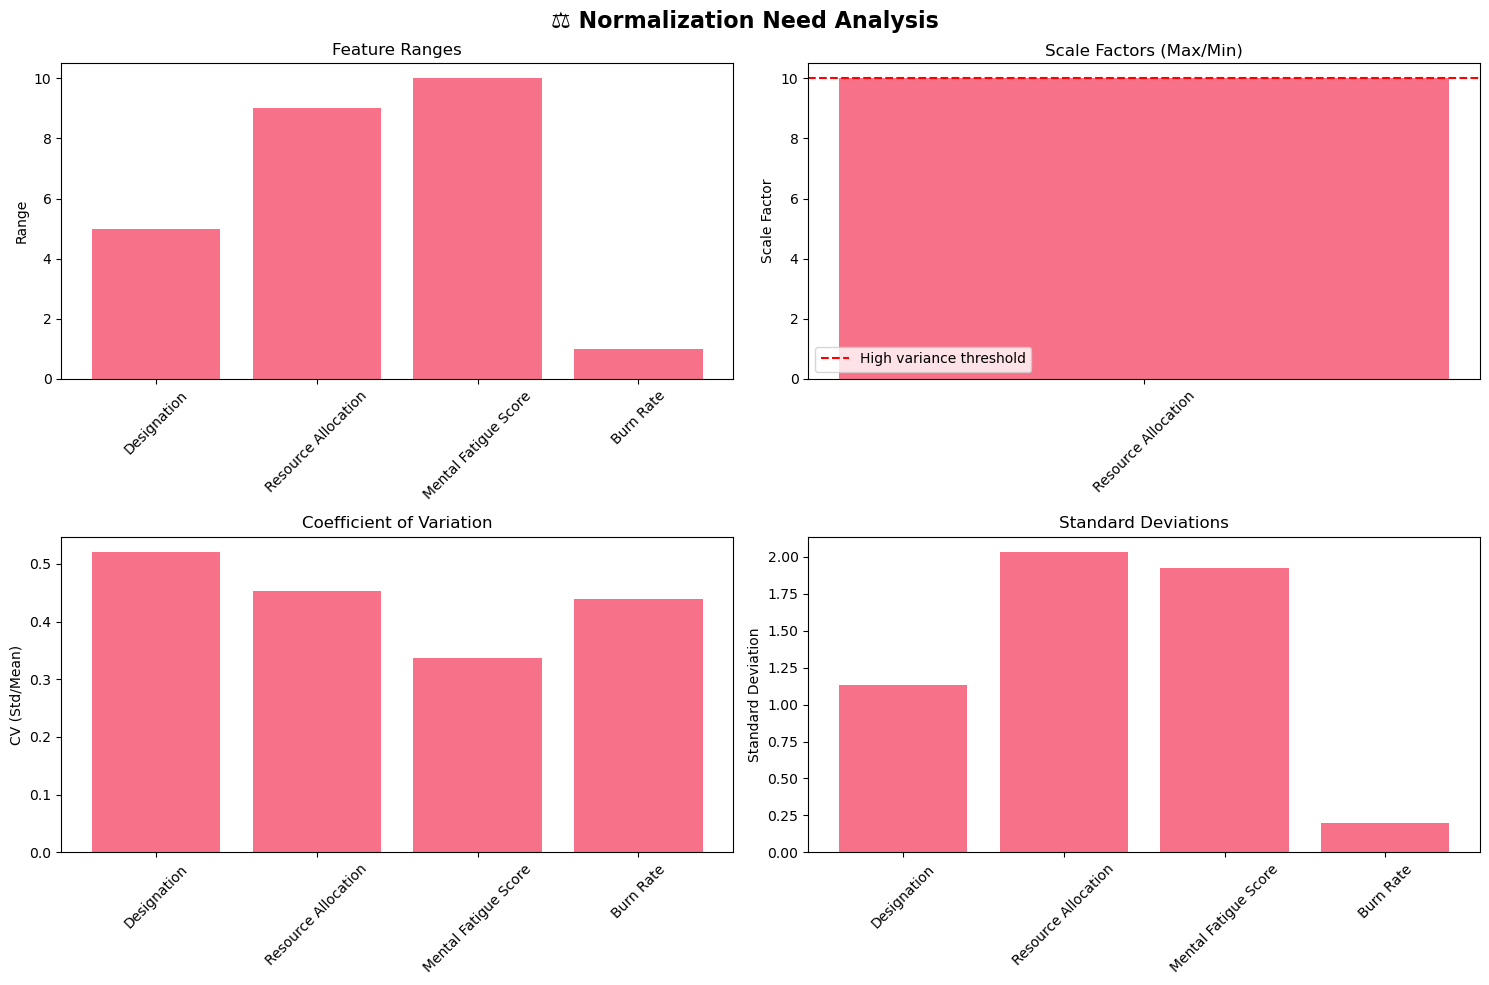


📋 NORMALIZATION RECOMMENDATIONS:
-----------------------------------
✅ OPTIONAL: Features are reasonably scaled
   Range ratio: 10.0x difference

For XGBoost: Normalization is optional but may help with:
- Faster convergence
- Better feature importance interpretation
- Consistency with other algorithms


In [289]:
run_complete_analysis(train)

In [6]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [7]:
train.shape

(22750, 9)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [9]:
train.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [10]:
print(sorted(train['Burn Rate'].unique()))

[0.04, 0.05, 0.11, 0.12, 0.15, 0.16, 0.19, 0.2, 0.22, 0.26, 0.27, 0.28, 0.29, 0.31, 0.32, 0.33, 0.34, 0.36, 0.37, 0.38, 0.39, 0.4, 0.42, 0.44, 0.45, 0.46, 0.47, 0.49, 0.5, 0.51, 0.52, 0.53, 0.56, 0.57, 0.59, 0.6, 0.61, 0.62, 0.63, 0.65, 0.66, 0.67, 0.68, 0.72, 0.79, 0.8, 0.81, 0.91, nan, 0.0, 0.01, 0.02, 0.03, 0.06, 0.07, 0.08, 0.09, 0.1, 0.13, 0.14, 0.17, 0.18, 0.21, 0.23, 0.24, 0.25, 0.3, 0.35, 0.41, 0.43, 0.48, 0.54, 0.55, 0.58, 0.64, 0.69, 0.7, 0.71, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [11]:
train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Check for empty strings

In [12]:
empty_counts = (train == '').sum()
print(empty_counts)

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


## Processing Variables

The IDs of the employees don't provide useful information and therefore, they must be dropped.

In [105]:
train = train.drop(columns=['Employee ID'])

### One-Hot Encoding

Convert categorical data into a numerical format that machine learning models can understand.

- Gender
- Company Type
- WFH Setup Available

should be converted to binary values using this method.

In [107]:
# "Female" = 0, "Male" = 1 
is_male = pd.get_dummies(train.Gender, drop_first=True)
# "Service" = 1, "Product" = 0
is_service = pd.get_dummies(train['Company Type'], drop_first=True)
# "Yes" = 1, "No" = 0
wfh_available = pd.get_dummies(train['WFH Setup Available'], drop_first=True)

In [108]:
for loc, column in enumerate(["is_male", "is_service", "wfh_available"], start=2):
    train.insert(loc=loc, column=column, value=eval(column))

train.drop(columns=["Gender", "Company Type", "WFH Setup Available"], axis=1, inplace=True)

In [109]:
train.head()

,Date of Joining,is_male,is_service,wfh_available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,False,True,False,2.0,3.0,3.8,0.16
1,2008-11-30,True,True,True,1.0,2.0,5.0,0.36
2,2008-03-10,False,False,True,2.0,NaN,5.8,0.49
3,2008-11-03,True,True,True,1.0,1.0,2.6,0.20
4,2008-07-24,False,True,False,3.0,7.0,6.9,0.52


In [17]:
is_male = pd.get_dummies(test.Gender, drop_first=True)
is_service = pd.get_dummies(test['Company Type'], drop_first=True)
wfh_available = pd.get_dummies(test['WFH Setup Available'], drop_first=True)

for loc, column in enumerate(["is_male", "is_service", "wfh_available"], start=2):
    test.insert(loc=loc, column=column, value=eval(column))

test.drop(columns=["Gender", "Company Type", "WFH Setup Available"], axis=1, inplace=True)

#### Date of Joining


The date of joining doesn't seem to have a direct relationship with our target at first glance, but before discarding it, we should transform it into another numeric feature to analyze if it has any correlation with our target variable.

Min date 2008-01-01
Max date 2008-12-31


<Axes: xlabel='Month', ylabel='Hired employees'>

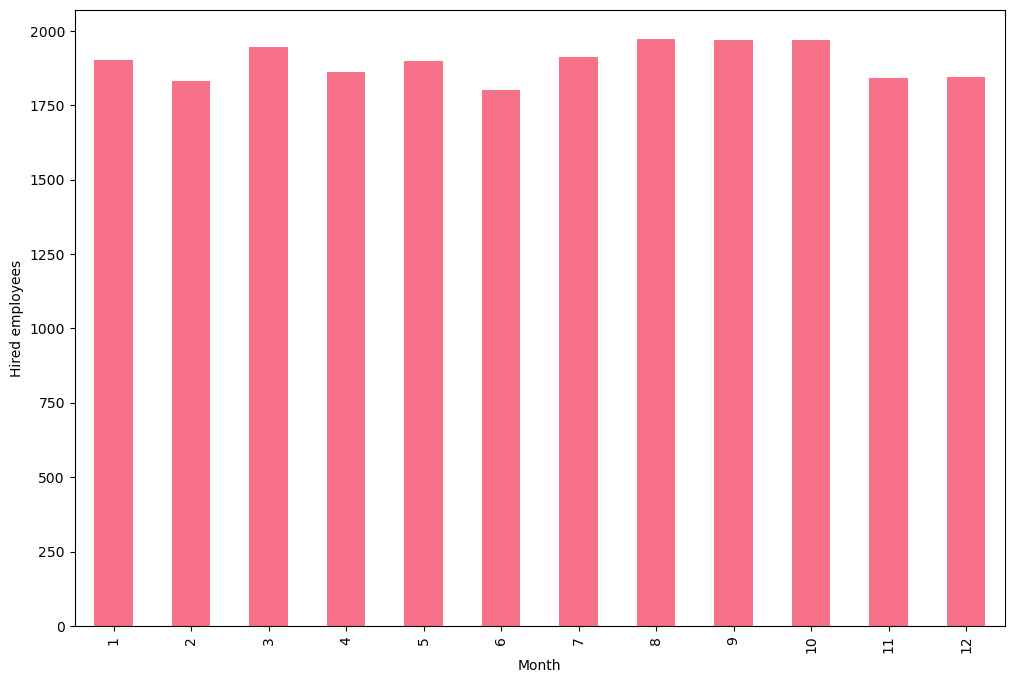

In [110]:
print(f"Min date {train['Date of Joining'].min()}")
print(f"Max date {train['Date of Joining'].max()}")
train_month = train.copy()

train_month['Date of Joining'] = train_month['Date of Joining'].astype("datetime64[ns]")
train_month['Date of Joining'].groupby(
    train_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel="Month", ylabel="Hired employees")

The date of joininig is uniformly distributed. In order to create a new feature which represents seniority, we could create a variables with the number of days worked. Since we don't have any information on when these observations were made, let's parse the date to the day of the year when the employees are hired.

In [111]:
dt_2008 = pd.to_datetime(["2008-01-01"]*len(train))
train['Days'] = train['Date of Joining'].astype("datetime64[ns]").sub(dt_2008).dt.days
train.Days

0        273
1        334
2         69
3        307
4        205
        ... 
22745    364
22746     18
22747    309
22748      9
22749      5
Name: Days, Length: 22750, dtype: int64

In [112]:
numeric_cols = train.select_dtypes(exclude='object').columns
correlations = train[numeric_cols].corr()['Burn Rate'].drop('Burn Rate')
print(correlations)

is_male                 0.154895
is_service              0.004281
wfh_available          -0.306266
Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Days                   -0.001358
Name: Burn Rate, dtype: float64


The day of the year the employee was hired doesn't have any correlation with out target. In this case, we will drop it.

In [113]:
train = train.drop(['Date of Joining', 'Days'], axis=1)
train.head().T

,0,1,2,3,4
is_male,False,True,False,True,False
is_service,True,True,False,True,True
wfh_available,False,True,True,True,False
Designation,2.0,1.0,2.0,1.0,3.0
Resource Allocation,3.0,2.0,NaN,1.0,7.0
Mental Fatigue Score,3.8,5.0,5.8,2.6,6.9
Burn Rate,0.16,0.36,0.49,0.2,0.52


### NaN Values

In [114]:
train.isna().sum()

is_male                    0
is_service                 0
wfh_available              0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

There are NaN values on our target "Burn Rate". The other with NaN values seem to have an important relation with the target as well. Let's see by computing the perason correlation.

In [115]:
numeric_cols = train.select_dtypes(exclude='object').columns
correlations = train[numeric_cols].corr()['Burn Rate'].drop('Burn Rate')
print(correlations)

is_male                 0.154895
is_service              0.004281
wfh_available          -0.306266
Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64


In [116]:
resource_nan = train['Resource Allocation'].isna()
mental_nan = train['Mental Fatigue Score'].isna()
burnrate_nan = train['Burn Rate'].isna()

# Values with no Burn Rate & Mental Fatigue Score
train[(burnrate_nan) & (mental_nan)]

,is_male,is_service,wfh_available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
45,True,True,True,2.0,3.0,NaN,NaN
47,False,False,True,3.0,6.0,NaN,NaN
122,False,False,False,3.0,5.0,NaN,NaN
127,True,True,False,3.0,5.0,NaN,NaN
135,False,True,True,1.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...
21507,True,True,False,2.0,4.0,NaN,NaN
21701,True,False,True,2.0,4.0,NaN,NaN
21888,True,True,False,3.0,6.0,NaN,NaN
21937,True,True,False,3.0,6.0,NaN,NaN


In [117]:
# Drop rows with missing target values
missing_target_rows = train.loc[train['Burn Rate'].isna(), :].index
train = train.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [26]:
train.isna().sum()

is_male                    0
is_service                 0
wfh_available              0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

We can roughly predict the **Mental Fatigue Score** by **Burn Rate**.

In [118]:
# Mask for rows where both burnrate_nan and mental_nan are True
double_nan_indices = train[(burnrate_nan) & (mental_nan)].index

# Drop rows where both features are missing, but keep partial rows where one of them exists
train.drop(index=double_nan_indices, axis=0, inplace=True)
# Reset DataFrame index so it's sequential again
train.reset_index(drop=True, inplace=True)
# Cleanup memory
del double_nan_indices, is_male, is_service, wfh_available

In [119]:
train.isna().sum()

is_male                    0
is_service                 0
wfh_available              0
Designation                0
Resource Allocation     1267
Mental Fatigue Score    1933
Burn Rate                  0
dtype: int64

#### Check Correlations

We want to check the correlations of variables to guide:
- Feature Selection
- Imputation Strategy
- Model interpretability

In [120]:
train_corr = train.corr()
train_corr['Burn Rate'].sort_values(ascending=False)
train_corr = train_corr.drop(columns='Burn Rate')

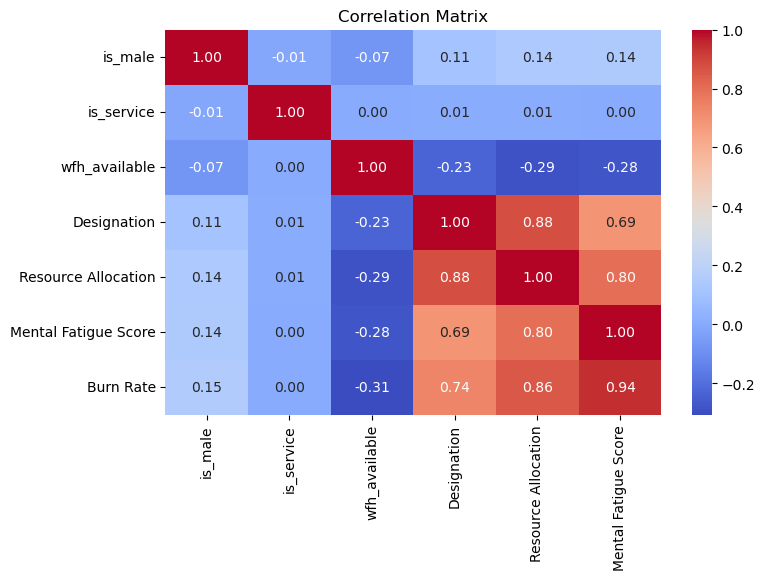

In [121]:
plt.figure(figsize=(8,5))
sns.heatmap(data=train_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.yticks(rotation=0)
plt.show()


There exists very high correlation between some of the variables. We shall focus on **Mental Fatigue Score** and **Burn Rate**.

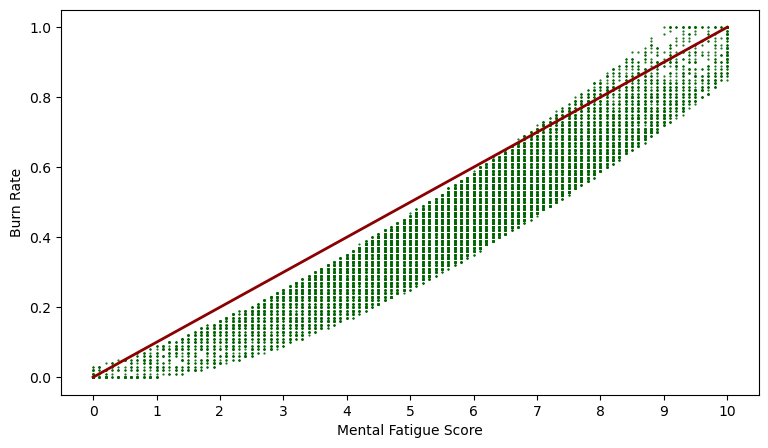

In [122]:
plt.figure(figsize=(9, 5))
plt.scatter("Mental Fatigue Score", "Burn Rate", data=train, s=0.3, c="darkgreen")
plt.plot([0,10], [0,1], linewidth=2, c="darkred")
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Burn Rate")
plt.xticks(range(0,11))
plt.show()

To prevent noise when filling in the missing values, we should interpolate the data by:
- Creating a copy of the dataset with non-null **Mental Fatigue Score** and **Burn Rate** values
- Bake the interpolation function
- Predict the NaN values by the function and replace them with the new values

In [123]:
describe_original = train.describe()
describe_original

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,21458.000000,20191.000000,19525.000000,21458.000000
mean,2.179420,4.484671,5.730064,0.452021
std,1.135119,2.048580,1.920670,0.198266
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [124]:
from scipy import interpolate

In [125]:
# Create the copy of our dataset and make sure there are no NaN values in MFS and Burn Rate
train_copy = train.copy(deep=True)

mental_not_na = train_copy['Mental Fatigue Score'].notna()
burn_not_na = train_copy['Burn Rate'].notna()

train_copy = train_copy[(mental_not_na) & (burn_not_na)]
del mental_not_na, burn_not_na

In [126]:
# Function to interpolate Mental Fatigue Score from a known Burn Rate
fn_mental = interpolate.interp1d(y=train_copy['Mental Fatigue Score'],
                                 x=train_copy['Burn Rate'],
                                 kind="linear",
                                 fill_value=None)

In [127]:
# Get rid of NaNs by calling the interpolation functions
for i in train[train['Mental Fatigue Score'].isna()].index:
    train.loc[i, 'Mental Fatigue Score'] =  fn_mental(train.loc[i, 'Burn Rate'])

In [128]:
train.isna().sum()

is_male                    0
is_service                 0
wfh_available              0
Designation                0
Resource Allocation     1267
Mental Fatigue Score       0
Burn Rate                  0
dtype: int64

Resource Allocation is also highly correlated with Designation

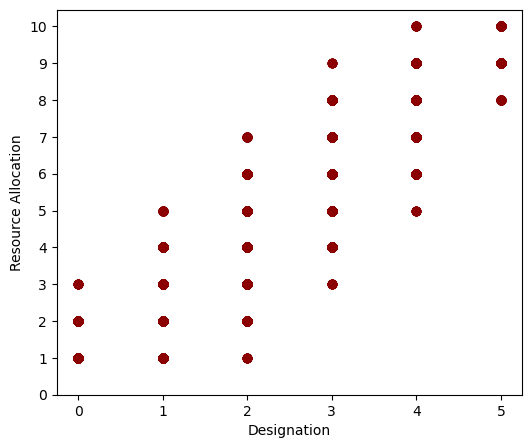

In [129]:
plt.figure(figsize=(6, 5))
plt.scatter('Designation', 'Resource Allocation', data=train, c='darkred')
plt.xlabel('Designation')
plt.ylabel('Resource Allocation')
plt.yticks(range(0,11))
plt.show()

#### Group-wise Imputation 
We will get the mean value for each **Designation** group and fill in the missing values in the **Resource Allocation** column based on the mean value.

In [130]:
for i in range(6):      # 0 to 5, Designation values
    mean_value = train['Resource Allocation'][train['Designation']==i].mean()

    # Build a condition mask for all rows where Designation == i AND Resource Allocation is NaN
    condition = (train['Designation']==i) & (train['Resource Allocation'].isna())

    # Fill in NaN values with group-specific mean
    train.loc[condition, 'Resource Allocation'] = mean_value

del train_copy, fn_mental

In [131]:
train.isna().sum()

is_male                 0
is_service              0
wfh_available           0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

### Handle Outliers

In [133]:
def remove_outliers(df, method='iqr'):
    """Remove outliers using IQR method by capping them"""
    df_clean = df.copy()
    numeric_cols = ['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()
        print(f"{col}: {outliers} outliers detected")
        
        # Cap outliers instead of removing to preserve data
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_clean

# Apply outlier treatment to continuous variables
continuous_cols = ['Resource Allocation', 'Mental Fatigue Score']


train_clean = remove_outliers(train)
print("Outlier treatment completed.")

Resource Allocation: 0 outliers detected
Mental Fatigue Score: 294 outliers detected
Burn Rate: 85 outliers detected
Outlier treatment completed.


In [134]:
train.isna().sum()

is_male                 0
is_service              0
wfh_available           0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

#### Original Data

In [135]:
display(describe_original.iloc[:3, -3:])

,Resource Allocation,Mental Fatigue Score,Burn Rate
count,20191.000000,19525.000000,21458.000000
mean,4.484671,5.730064,0.452021
std,2.048580,1.920670,0.198266


#### Cleaned Data

In [136]:
describe_botox = train.describe()
display(describe_botox.iloc[:3, -3:])

,Resource Allocation,Mental Fatigue Score,Burn Rate
count,21458.000000,21458.000000,21458.000000
mean,4.483679,5.716642,0.452021
std,2.033964,1.925369,0.198266


In [137]:
train.describe

<bound method NDFrame.describe of        is_male  is_service  wfh_available  Designation  Resource Allocation  \
0        False        True          False          2.0             3.000000   
1         True        True           True          1.0             2.000000   
2        False       False           True          2.0             4.183048   
3         True        True           True          1.0             1.000000   
4        False        True          False          3.0             7.000000   
...        ...         ...            ...          ...                  ...   
21453    False        True          False          1.0             3.000000   
21454    False       False           True          3.0             6.000000   
21455     True        True           True          3.0             7.000000   
21456    False        True          False          2.0             5.000000   
21457     True       False          False          3.0             6.000000   

       Mental Fat

## Scale Numeric Features

In [138]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
scaler = StandardScaler()

train_scaled = train.copy()
train_scaled[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [139]:
train.head()

,is_male,is_service,wfh_available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,False,True,False,2.0,3.000000,3.8,0.16
1,True,True,True,1.0,2.000000,5.0,0.36
2,False,False,True,2.0,4.183048,5.8,0.49
3,True,True,True,1.0,1.000000,2.6,0.20
4,False,True,False,3.0,7.000000,6.9,0.52


## Feature Engineering

Creating derived features.

# Training & Validation


## Data Preparation

In [140]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error as mae, r2_score
from statsmodels.tools.eval_measures import mse, rmse
# Split data using cleaned dataset with better parameters
X_train, X_val, y_train, y_val = train_test_split(
    train_scaled.iloc[:, :-1],  # Use cleaned data
    train_scaled.iloc[:, -1],    # Target variable
    test_size=0.2,              # Reduced validation size for more training data
    shuffle=True,
    random_state=42             # Fixed seed for reproducibility
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Features: {X_train.columns.tolist()}")

Training set shape: (17166, 6)
Validation set shape: (4292, 6)
Features: ['is_male', 'is_service', 'wfh_available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score']


## XGBoost

In [141]:
import xgboost as xgb
import optuna

In [186]:
from sklearn.model_selection import KFold

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'early_stopping_rounds': 50,
        'random_state': 42
    }

    # Use more sophisticated cross-validation with more folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, valid_idx in kf.split(X_train):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model = xgb.XGBRegressor(**params)
        model.fit(
            X_t, y_t,
            eval_set=[(X_v, y_v)],
            verbose=False
        )

        y_pred = model.predict(X_v)
        scores.append(r2_score(y_v, y_pred))

    return np.mean(scores)

In [187]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  

print("Best hyperparameters:")
print(study.best_params)
print(f"Best R² score: {study.best_value:.4f}")

[I 2025-09-01 23:05:45,579] A new study created in memory with name: no-name-ad37f8b3-713b-49aa-9a19-8a4ae993b6dd
[I 2025-09-01 23:05:46,947] Trial 0 finished with value: 0.9294371126633539 and parameters: {'max_depth': 5, 'learning_rate': 0.02684858858066921, 'n_estimators': 217, 'subsample': 0.8474935571570935}. Best is trial 0 with value: 0.9294371126633539.
[I 2025-09-01 23:05:48,502] Trial 1 finished with value: 0.9293760349797797 and parameters: {'max_depth': 4, 'learning_rate': 0.06894015997917953, 'n_estimators': 340, 'subsample': 0.9866837315220001}. Best is trial 0 with value: 0.9294371126633539.
[I 2025-09-01 23:05:49,986] Trial 2 finished with value: 0.927197854531572 and parameters: {'max_depth': 9, 'learning_rate': 0.05151857125509082, 'n_estimators': 919, 'subsample': 0.8835011924468018}. Best is trial 0 with value: 0.9294371126633539.
[I 2025-09-01 23:05:50,705] Trial 3 finished with value: 0.9292772910119405 and parameters: {'max_depth': 4, 'learning_rate': 0.205838641

Best hyperparameters:
{'max_depth': 5, 'learning_rate': 0.04237707838091179, 'n_estimators': 679, 'subsample': 0.8611093424001036}
Best R² score: 0.9296


In [188]:
best_params = study.best_trial.params

best_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    booster='gbtree',
    **best_params,
)
best_xgb_model.fit(X_train, y_train)
unoptimized_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    booster='gbtree'
)
unoptimized_model.fit(X_train, y_train)

val_preds = best_xgb_model.predict(X_val)
unoptimized_preds = unoptimized_model.predict(X_val)
print("Validation R2:", r2_score(y_val, val_preds))
print("Validation R2 for unoptimized model:", r2_score(y_val, unoptimized_preds))
print("Increase in performance after hyperparameter optimization: ", r2_score(y_val, val_preds) - r2_score(y_val, unoptimized_preds))

Validation R2: 0.9259166440625409
Validation R2 for unoptimized model: 0.9247195684424728
Increase in performance after hyperparameter optimization:  0.0011970756200680999


In [303]:
# Make predictions
train_preds = best_xgb_model.predict(X_train)

print("=== MODEL PERFORMANCE ===")
print(f"Training R²:   {r2_score(y_train, train_preds):.4f}")
print(f"Validation R²: {r2_score(y_val, val_preds):.4f}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds)):.4f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, val_preds)):.4f}")
print(f"Training MAE:  {mean_absolute_error(y_train, train_preds):.4f}")
print(f"Validation MAE: {mean_absolute_error(y_val, val_preds):.4f}")

# Check for overfitting
r2_diff = r2_score(y_train, train_preds) - r2_score(y_val, val_preds)
print(f"\nOverfitting check (R² difference): {r2_diff:.4f}")

=== MODEL PERFORMANCE ===
Training R²:   0.9364
Validation R²: 0.9259
Training RMSE: 0.0501
Validation RMSE: 0.0535
Training MAE:  0.0403
Validation MAE: 0.0432

Overfitting check (R² difference): 0.0105


In [81]:
def show_errors(y_validations, y_predictions):
    """Function to show error statistics of the validation part.
    y_validations: Validation values
    y_predictions: Predicted values"""
    mae_fn = mae(y_validations, y_predictions)
    mse_fn = mse(y_validations, y_predictions)
    rmse_fn = rmse(y_validations, y_predictions)

    print("\n---------Error Statistics of Validation Part---------")
    print(f"Mean Absolute Error (MAE)             : {mae_fn:.4f}")
    print(f"Mean Square Error (MSE)               : {mse_fn:.4f}")
    print(f"Root Mean Square Error (RMSE)         : {rmse_fn:.4f}\n")


## Random Forest Regressor

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
import time

In [260]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth':  trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, valid_idx in kf.split(X_train):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model = RandomForestRegressor(**params)
        model.fit(X_t, y_t)
        y_pred = model.predict(X_v)
        scores.append(r2_score(y_v, y_pred))

    return np.mean(scores)

In [261]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)
print("Best hyperparameters (RF):", study_rf.best_params)
print(f"Best R² score (RF): {study_rf.best_value:.4f}")

[I 2025-09-02 23:16:46,497] A new study created in memory with name: no-name-a721ff7d-106d-414d-ba21-d17ea7dba421
[I 2025-09-02 23:16:49,045] Trial 0 finished with value: 0.9250640516294142 and parameters: {'n_estimators': 317, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.9250640516294142.
[I 2025-09-02 23:16:51,143] Trial 1 finished with value: 0.9265704755399302 and parameters: {'n_estimators': 258, 'max_depth': 28, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.9265704755399302.
[I 2025-09-02 23:16:52,360] Trial 2 finished with value: 0.9262002159984404 and parameters: {'n_estimators': 177, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 16, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.9265704755399302.
[I 2025-09-02 23:17:02,675] Trial 3 finished with value: 0.926022997341576

Best hyperparameters (RF): {'n_estimators': 850, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_features': None, 'bootstrap': True}
Best R² score (RF): 0.9274


In [163]:
def rf_gridsearch(X_train, y_train):
    """Tune Random Forest using GridSearchCV"""
    print("GridSearchCV Tuning")
    start_time = time.time()

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [8, 12, 16, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', None],
    }
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best R² score: {grid_search.best_score_:.4f}")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Total combinations tested: {len(grid_search.cv_results_['mean_test_score'])}")
    
    return grid_search.best_estimator_, grid_search.best_params_

In [194]:
best_rf_model, best_rf_params = rf_gridsearch(X_train, y_train)

GridSearchCV Tuning
Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

Best parameters: {'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R² score: 0.9281
Time taken: 81.40 seconds
Total combinations tested: 96


In [195]:
forest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    criterion="absolute_error",
    min_samples_leaf=1,
    min_samples_split=5,
    max_features=None,
    random_state=19)

In [196]:
forest_scoreCV = cross_val_score(
    estimator=best_rf_model,
    X=X_train,
    y=y_train,
    cv=5,
    verbose=2,
    n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [198]:
print(f"Mean score of Random Forest model: {forest_scoreCV.mean():.5f}")

Mean score of Random Forest model: 0.92851


In [199]:
forest_predictCV = cross_val_predict(
    estimator=best_model_grid,
    X=X_val,
    y=y_val,
    cv=5,
    verbose=2,
    n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [200]:
show_errors(y_val, forest_predictCV)


---------Error Statistics of Validation Part---------
Mean Absolute Error (MAE)             : 0.0444
Mean Square Error (MSE)               : 0.0030
Root Mean Square Error (RMSE)         : 0.0546



## Decision Trees

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def objective_dt(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, valid_idx in kf.split(X_train):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model = DecisionTreeRegressor(**params)
        model.fit(X_t, y_t)
        y_pred = model.predict(X_v)
        scores.append(r2_score(y_v, y_pred))

    return np.mean(scores)

In [175]:
def dt_gridsearch(X_train, y_train):
    """Tune Decision Tree using GridSearchCV"""
    start_time = time.time()
    param_grid = {
        'max_depth': [5, 8, 12, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'criterion': ['squared_error', 'absolute_error'],
        'max_features': [None, 'sqrt']
    }

    dt = DecisionTreeRegressor(random_state=42)

    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    end_time = time.time()

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best R² score: {grid_search.best_score_:.4f}")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Total combinations tested: {len(grid_search.cv_results_['mean_test_score'])}")
    
    return grid_search.best_estimator_, grid_search.best_params_

In [176]:
best_dt_model, best_dt_params = dt_gridsearch(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best R² score: 0.9247
Time taken: 46.66 seconds
Total combinations tested: 180


In [155]:
def train_model(estimator, parameters, cv=10, verbose=1, X_data=X_train):
    """Function to train your model with a grid search.
    Just provide the function an estimator and its parameters.
    'estimator' example: knn_model
    'parameters' example: knn_params
    Optionally, you can change 'cv', 'verbose' or X_input as well."""
    gridCV = GridSearchCV(estimator=estimator, 
                          param_grid=parameters, 
                          n_jobs=-1, 
                          cv=cv, 
                          verbose=verbose)
    gridCV.fit(X_data, y_train)

    print("\nBest training parameters:", gridCV.best_params_)
    print("Best training score: {:.4f}".format(gridCV.best_score_))
    show_errors(y_val, gridCV.predict(X_val))
    return gridCV

In [156]:
tree_model = DecisionTreeRegressor(random_state=19)
tree_params = {
    "max_depth": range(8,10),
    "min_samples_split": range(2,5),
    "splitter": ("best", "random"),
    "min_samples_leaf": range(5,15)
}
tree_gridCV = train_model(tree_model, tree_params)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits

Best training parameters: {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}
Best training score: 0.9260

---------Error Statistics of Validation Part---------
Mean Absolute Error (MAE)             : 0.0443
Mean Square Error (MSE)               : 0.0030
Root Mean Square Error (RMSE)         : 0.0546



## Model Comparison

### Collect all Tuned Models

In [201]:
models = {
    'XGBoost': best_xgb_model,
    'Random Forest': best_rf_model,
    'Decision Tree': best_dt_model,
}

model_params = {
    'XGBoost': study.best_params,
    'Random Forest': best_rf_params,
    'Decision Tree': best_dt_params
}   

### Evaluate on Validation Set

In regression, a residual is the difference between the actual (observed) value of a data point and the value predicted by the regression model. It quantifies how far off the model's prediction is for a given point. Residuals are used to assess a model's accuracy and fit to the data, with smaller residuals indicating a better fit. 

In [202]:
def evaluate_model(model, X_val, y_val, model_name):
    predictions = model.predict(X_val)

    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)

    # Calculate residuals
    residuals = y_val - predictions

    return {
        'model': model_name,
        'r2_score': r2,
        'rmse': rmse,
        'mae': mae,
        'predictions': predictions,
        'residuals': residuals
    }

In [203]:
print("===Validation Set Evaluation===")
validation_results = {}

for name, model in models.items():
    result = evaluate_model(model, X_val, y_val, name)
    validation_results[name] = result

    print(f"\n{name} Performance:")
    print(f"  R² Score: {result['r2_score']:.4f}")
    print(f"  RMSE: {result['rmse']:.4f}")
    print(f"  MAE: {result['mae']:.4f}")

===Validation Set Evaluation===

XGBoost Performance:
  R² Score: 0.9259
  RMSE: 0.0535
  MAE: 0.0432

Random Forest Performance:
  R² Score: 0.9257
  RMSE: 0.0536
  MAE: 0.0435

Decision Tree Performance:
  R² Score: 0.9226
  RMSE: 0.0547
  MAE: 0.0443


### Model Comparison Visualization

In [205]:
def create_comparison_table(results):
    comparison_data = []

    for name, result in results.items():
        comparison_data.append({
            'Model': name,
            'R² Score': result['r2_score'],
            'RMSE': result['rmse'],
            'MAE': result['mae']
    })

    df_comparison = pd.DataFrame(comparison_data)
    df_comparison = df_comparison.sort_values('R² Score', ascending=False)

    return df_comparison


comparison_df = create_comparison_table(validation_results)
print("\n=== MODEL COMPARISON TABLE ===")
print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")


=== MODEL COMPARISON TABLE ===
           Model  R² Score    RMSE     MAE
0        XGBoost    0.9259  0.0535  0.0432
1  Random Forest    0.9257  0.0536  0.0435
2  Decision Tree    0.9226  0.0547  0.0443
Best Model: XGBoost


In [207]:
def plot_model_comparison(comparison_df):
    """Plot model performance comparison"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # R² Score
    axes[0].bar(comparison_df['Model'], comparison_df['R² Score'], color='skyblue')
    axes[0].set_title('R² Score Comparison')
    axes[0].set_ylabel('R² Score')
    axes[0].tick_params(axis='x', rotation=45)
    
    # RMSE
    axes[1].bar(comparison_df['Model'], comparison_df['RMSE'], color='lightcoral')
    axes[1].set_title('RMSE Comparison')
    axes[1].set_ylabel('RMSE')
    axes[1].tick_params(axis='x', rotation=45)
    
    # MAE
    axes[2].bar(comparison_df['Model'], comparison_df['MAE'], color='lightgreen')
    axes[2].set_title('MAE Comparison')
    axes[2].set_ylabel('MAE')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_predictions_vs_actual(results):
    """Plot predictions vs actual for all models"""
    fig, axes = plt.subplots(1, len(results), figsize=(5*len(results), 5))
    if len(results) == 1:
        axes = [axes]
    
    for idx, (name, result) in enumerate(results.items()):
        ax = axes[idx]
        
        # Scatter plot
        ax.scatter(y_val, result['predictions'], alpha=0.6)
        
        # Perfect prediction line
        min_val = min(y_val.min(), result['predictions'].min())
        max_val = max(y_val.max(), result['predictions'].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
        
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{name}\nR² = {result["r2_score"]:.4f}')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_residuals_analysis(results):
    """Plot residuals analysis for all models"""
    fig, axes = plt.subplots(2, len(results), figsize=(5*len(results), 10))
    if len(results) == 1:
        axes = axes.reshape(2, 1)
    
    for idx, (name, result) in enumerate(results.items()):
        residuals = result['residuals']
        predictions = result['predictions']
        
        # Residuals vs Predicted
        axes[0, idx].scatter(predictions, residuals, alpha=0.6)
        axes[0, idx].axhline(y=0, color='r', linestyle='--')
        axes[0, idx].set_xlabel('Predicted Values')
        axes[0, idx].set_ylabel('Residuals')
        axes[0, idx].set_title(f'{name} - Residuals vs Predicted')
        axes[0, idx].grid(True, alpha=0.3)
        
        # Residuals distribution
        axes[1, idx].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
        axes[1, idx].set_xlabel('Residuals')
        axes[1, idx].set_ylabel('Frequency')
        axes[1, idx].set_title(f'{name} - Residuals Distribution')
        axes[1, idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

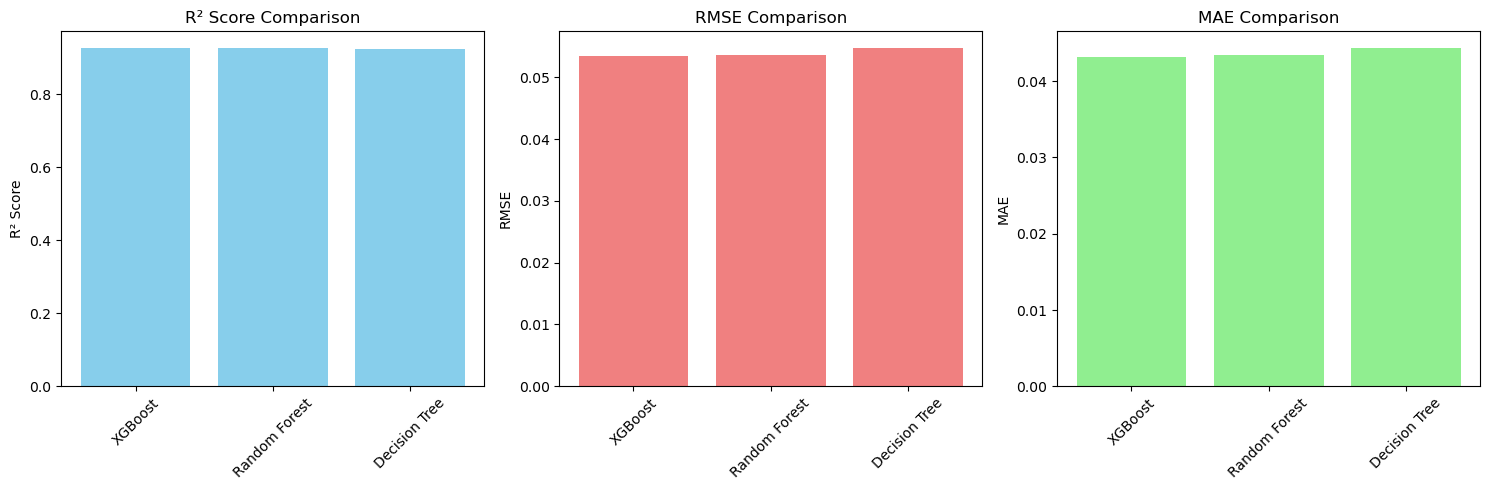

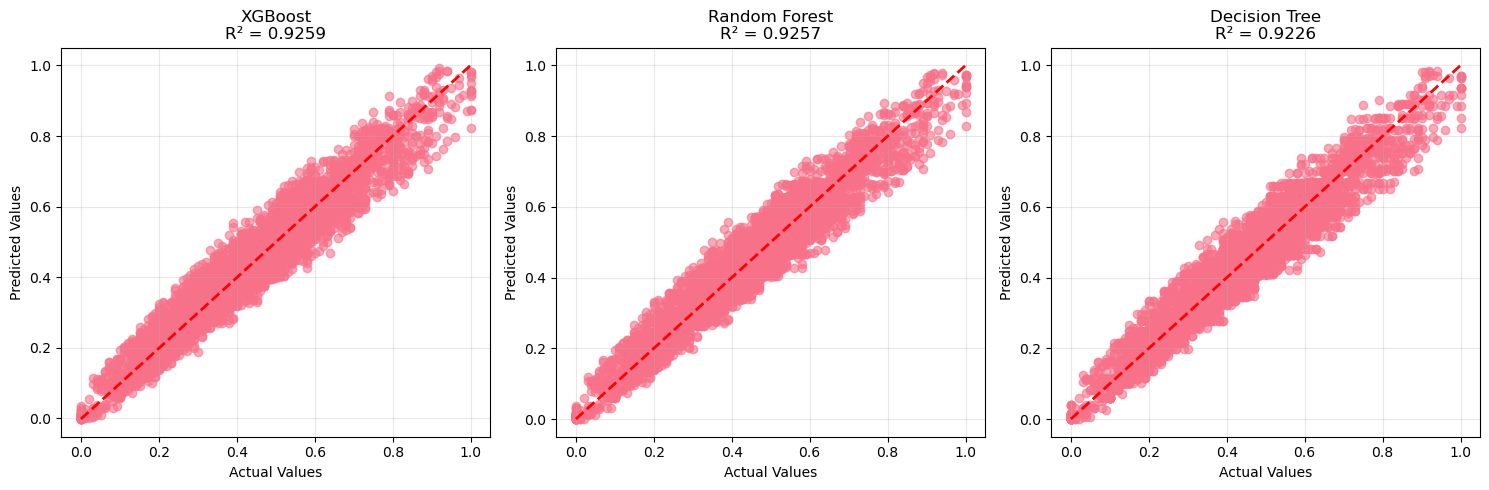

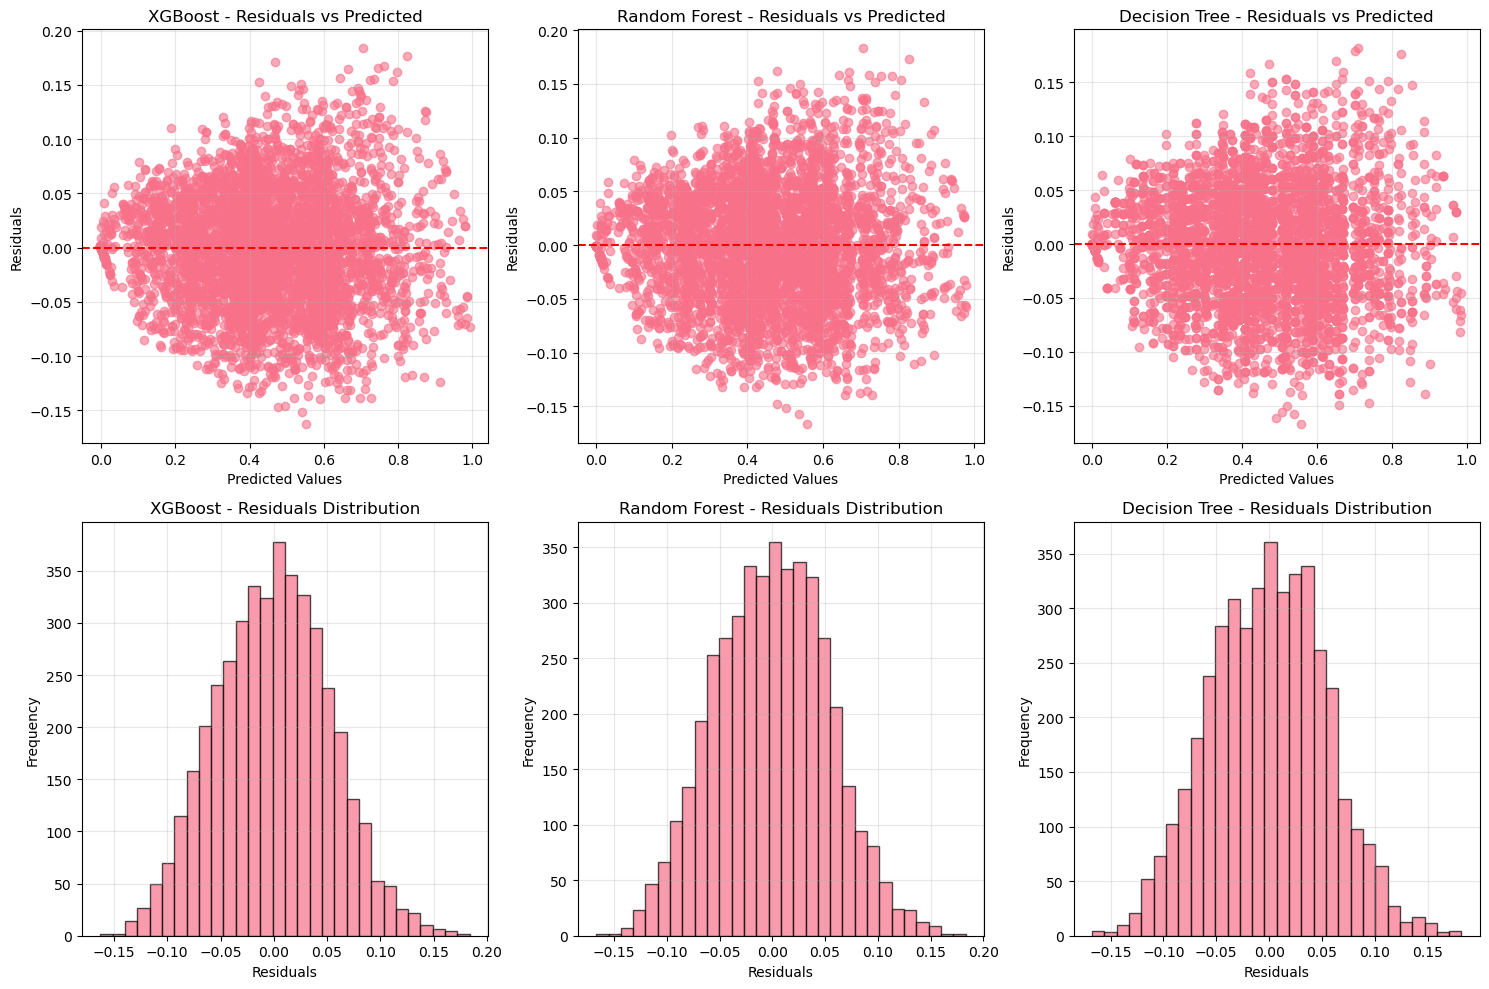

In [208]:
plot_model_comparison(comparison_df)
plot_predictions_vs_actual(validation_results)
plot_residuals_analysis(validation_results)

### Statistical Tests

In [209]:
def perform_statistical_tests(results):
    """Perform statistical tests on residuals"""
    print("\n=== STATISTICAL ANALYSIS ===")
    
    for name, result in results.items():
        residuals = result['residuals']
        
        # Normality test (Shapiro-Wilk)
        shapiro_stat, shapiro_p = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
        
        # Mean of residuals (should be close to 0)
        residuals_mean = np.mean(residuals)
        
        print(f"\n{name} Residuals Analysis:")
        print(f"  Mean of residuals: {residuals_mean:.6f}")
        print(f"  Std of residuals: {np.std(residuals):.4f}")
        print(f"  Shapiro-Wilk p-value: {shapiro_p:.6f}")
        print(f"  Normal residuals: {'Yes' if shapiro_p > 0.05 else 'No'}")

perform_statistical_tests(validation_results)


=== STATISTICAL ANALYSIS ===

XGBoost Residuals Analysis:
  Mean of residuals: -0.000775
  Std of residuals: 0.0535
  Shapiro-Wilk p-value: 0.000195
  Normal residuals: No

Random Forest Residuals Analysis:
  Mean of residuals: -0.000806
  Std of residuals: 0.0536
  Shapiro-Wilk p-value: 0.000025
  Normal residuals: No

Decision Tree Residuals Analysis:
  Mean of residuals: -0.000938
  Std of residuals: 0.0547
  Shapiro-Wilk p-value: 0.000042
  Normal residuals: No


### XGBoost Feature Importance

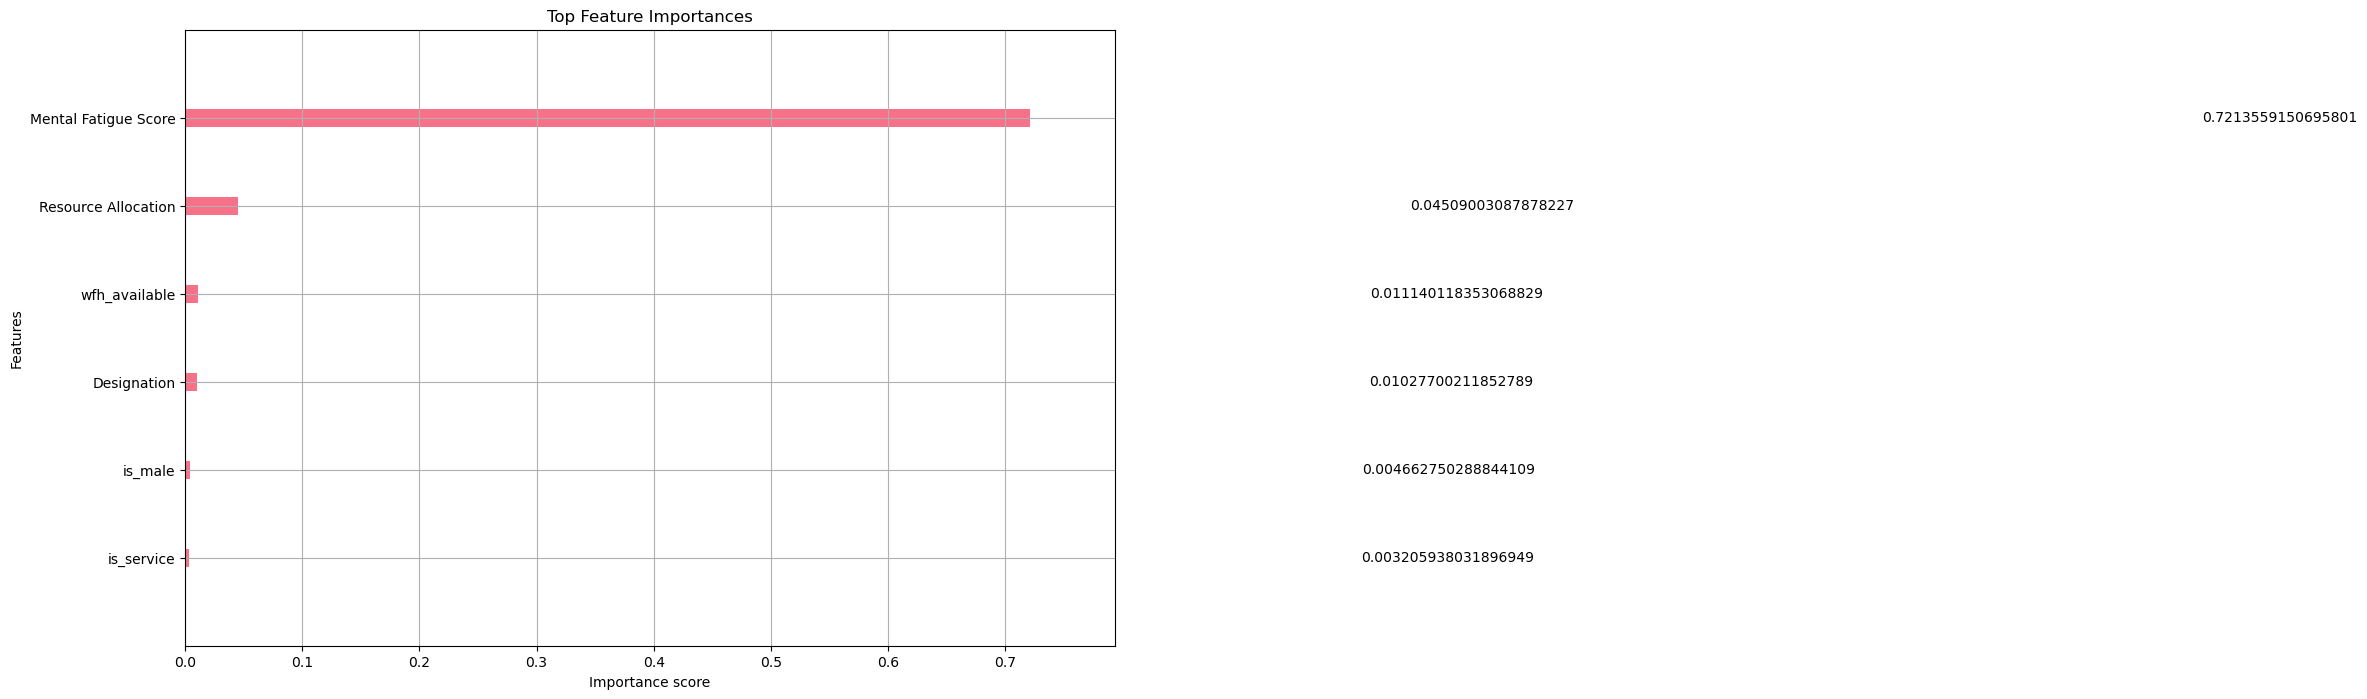

In [212]:
xgb.plot_importance(best_xgb_model, max_num_features=10, importance_type="gain")
plt.title("Top Feature Importances")
plt.show()

### Random Forest Feature Importance

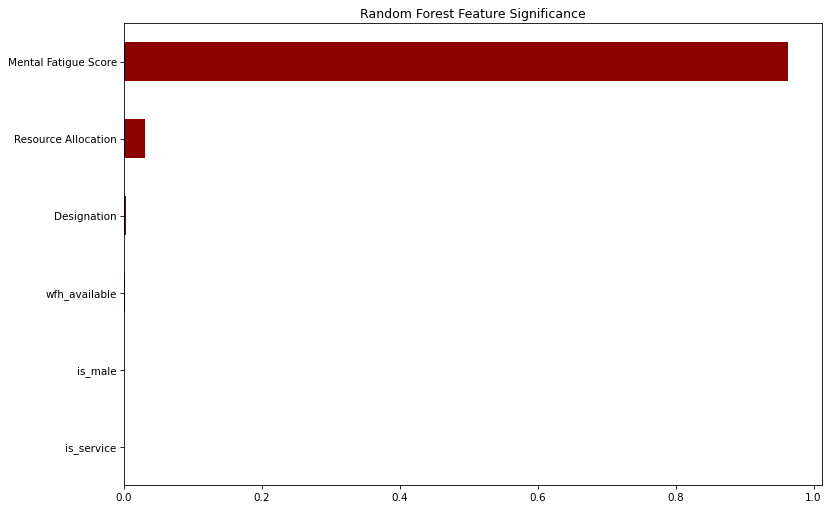

In [217]:
sp = dict(zip(X_train.columns, best_rf_model.feature_importances_))
# Sort with respect to their significance values
sp = {k: v for k, v in sorted(sp.items(), key=lambda i: i[1], reverse=True)}
significant_names = list(sp.keys())
significant_values = list(sp.values())

significance = pd.Series(data=significant_values,
                         index=significant_names).sort_values()
plt.figure(dpi=75)
significance.plot(kind='barh', color='darkred')
plt.title("Random Forest Feature Significance")
plt.show()
del sp, significance, significant_names, significant_values

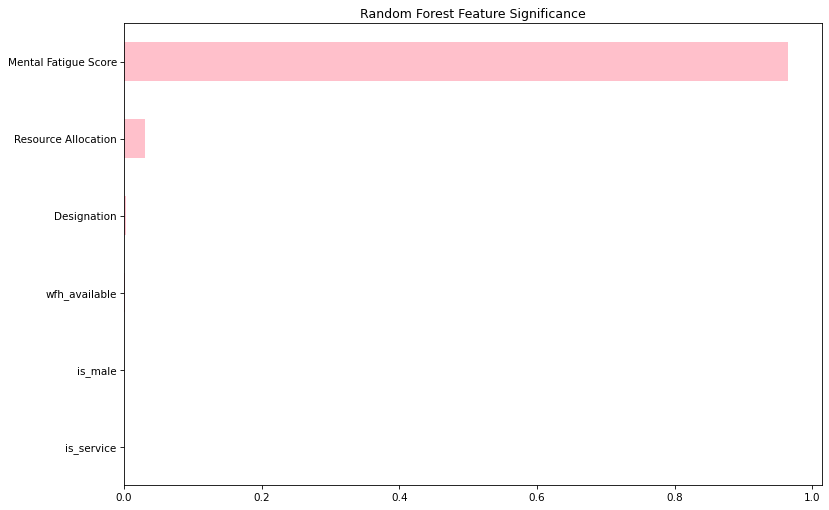

In [219]:
sp = dict(zip(X_train.columns, best_dt_model.feature_importances_))
# Sort with respect to their significance values
sp = {k: v for k, v in sorted(sp.items(), key=lambda i: i[1], reverse=True)}
significant_names = list(sp.keys())
significant_values = list(sp.values())

significance = pd.Series(data=significant_values,
                         index=significant_names).sort_values()
plt.figure(dpi=75)
significance.plot(kind='barh', color='pink')
plt.title("Random Forest Feature Significance")
plt.show()
del sp, significance, significant_names, significant_values

## Final Test Evaluation

In [220]:
def final_test_evaluation(best_model, X_test, y_test, model_name):
    """Final evaluation on test set"""
    print(f"\n=== FINAL TEST SET EVALUATION - {model_name} ===")
    
    test_predictions = best_model.predict(X_test)
    
    test_r2 = r2_score(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    print(f"Final Test Performance:")
    print(f"  R² Score: {test_r2:.4f}")
    print(f"  RMSE: {test_rmse:.a4f}")
    print(f"  MAE: {test_mae:.4f}")
    
    return {
        'predictions': test_predictions,
        'r2_score': test_r2,
        'rmse': test_rmse,
        'mae': test_mae
    }

In [256]:
X_test = test_scaled
y_test = None
final_results = final_test_evaluation(best_xgb_model, X_val, y_val, 'XGBoost')


=== FINAL TEST SET EVALUATION - XGBoost ===
Final Test Performance:
  R² Score: 0.9259
  RMSE: 0.0535
  MAE: 0.0432


In [ ]:
test_features = test

# Ensure test features match training features
print("Training features:", X_train.columns.tolist())
print("Test features:", test_features.columns.tolist())

# Make predictions
test_predictions = final_model.predict(test_features)

In [287]:
# results = pd.DataFrame({
#     'Employee_Index': range(len(test_predictions)),
#     'Predicted_Burn_Rate': test_predictions
# })

# Add risk categories
def categorize_burnout_risk(burn_rate):
    if burn_rate <= 0.3:
        return 'Low Risk'
    elif burn_rate <= 0.6:
        return 'Medium Risk'
    else:
        return 'High Risk'
    
# results['Risk_Category'] = results['Predicted_Burn_Rate'].apply(categorize_burnout_risk)

# # Display results
# print("=== BURNOUT PREDICTIONS ===")
# print(results.head(10))
# print(f"\nRisk Distribution:")
# print(results['Risk_Category'].value_counts())

In [ ]:
# Visualize prediction distribution
plt.figure(figsize=(12, 4))

# Histogram of predictions
plt.subplot(1, 2, 1)
plt.hist(test_predictions, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Burn Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Burn Rates')
plt.axvline(test_predictions.mean(), color='red', linestyle='--', label=f'Mean: {test_predictions.mean():.3f}')
plt.legend()

# Risk category pie chart
plt.subplot(1, 2, 2)
risk_counts = results['Risk_Category'].value_counts()
colors = ['green', 'orange', 'red']
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Burnout Risk Distribution')

plt.tight_layout()
plt.show()

In [ ]:
results.to_csv('../outputs/burnout_predictions.csv', index=False)
print("Predictions saved to '../outputs/burnout_predictions.csv")

# Create detailed report
detailed_results = test_features.copy()
detailed_results['Predicted_Burn_Rate'] = test_predictions
detailed_results['Risk_Category'] = results['Risk_Category']

# Save detailed results
detailed_results.to_csv('../outputs/detailed_burnout_predictions.csv', index=False)
print("Detailed predictions saved to '../outputs/detailed_burnout_predictions.csv'")

In [ ]:
def predict_single_employee(designation, resource_allocation, mental_fatigue, 
                            is_male, is_service, wfh_available):
    """Predict burnout risk for a single employee based on their features."""

    # Create DataFrame with employee data
    employee_data = pd.DataFrame({
        'is_male': [is_male],
        'is_service': [is_service],
        'wfh_available': [wfh_available],
        'Designation': [designation],
        'Resource Allocation': [resource_allocation],
        'Mental Fatigue Score': [mental_fatigue]
    })

    # Make prediction
    prediction = final_model.predict(employee_data)
    risk = categorize_burnout_risk(prediction[0])

    return prediction[0], risk

In [ ]:
# Example usage
burn_rate, risk = predict_single_employee(
    is_male=1,
    is_service=0,
    wfh_available=1,
    designation=3,
    resource_allocation=10,
    mental_fatigue=4.5
)

print(f"Risk Category: {risk}")
print(f"Predicted Burn Rate: {burn_rate:.4f}")